# Demo of Graph Theoretical Analysis on EPM Mossy Cell Data

In [1]:
import os
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import SigProc
from analysis.graph_analysis_utils import NeuronNetwork
from analysis.analysis_utils import FeatureExtractor
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [2]:
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [3]:
mouse_directory = os.path.join(os.path.expanduser("~"), "Hen_Lab/Mice/EPM")

if not os.path.exists(mouse_directory):
    print("The mouse directory does not exist", file=sys.stderr)

file_num = 0
raw_files = list()
for dir_name, subdir_list, file_list in os.walk(mouse_directory):
    for file_name in file_list:
        if file_name.endswith(".csv"):
            print("{}. full path of: {} is: {}".format(file_num, file_name, os.path.join(dir_name, file_name)))
            file_num += 1
            raw_files.append(os.path.join(dir_name, file_name))

0. full path of: behavior_drd87.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd87/behavior_drd87.csv
1. full path of: Raw_EPM_drd87.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd87/Raw_EPM_drd87.csv
2. full path of: Raw_EPM2_drd87.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd87/Raw_EPM2_drd87.csv
3. full path of: Raw_EPM_drd73.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd73/Raw_EPM_drd73.csv
4. full path of: behavior_drd73.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd73/behavior_drd73.csv
5. full path of: Raw_EPM_drd77.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd77/Raw_EPM_drd77.csv
6. full path of: behavior_drd77.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd77/behavior_drd77.csv
7. full path of: behavior_drd46.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd46/behavior_drd46.csv
8. full path of: Raw_EPM_drd46.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd46/Raw_EPM_drd46.csv


## DRD87

In [4]:
drd87_data = pd.read_csv(raw_files[2], header=None)
_, auc_dataframe, cell_transients_dataframe = SigProc.detect_ca_transients_mossy(drd87_data, 2, 0.5, 0.2, 10)

beh_cols = [
    "Trial_time", "Recording_time", "X_center", "Y_center", "Area", "Areachange", "Elongation", "Distance_moved", "Velocity", "Arena_centerpoint", 
    "Open1_centerpoint", "Open2_centerpoint", "Closed1_centerpoint", "Closed2_centerpoint", "OpenArms_centerpoint", "ClosedArms_centerpoint", "Result_1"
]

behavior_df = pd.read_csv(raw_files[0], header=None)
drd87_fe = FeatureExtractor(cell_transients_df=cell_transients_dataframe, auc_df=auc_dataframe, behavior_df=behavior_df, behavior_col_names=beh_cols)

# Only leave the neuron numbers to save space when plotting the networks
drd87_fe.cell_transients_df.columns = [i for i in range(1, len(drd87_fe.cell_transients_df.columns)+1)]

/Users/saveliyyusufov/Hen_Lab/analysis/analysis_utils.py:26: Warning:

Row multiple to downsample behavior dataframe not specified. Behavior dataframe will be downsampled by a row multiple of 3



## DRD77

In [5]:
drd77_data = pd.read_csv(raw_files[5], header=None)
drd77_data = FeatureExtractor.downsample_dataframe(drd77_data, 2)
_, auc_dataframe, cell_transients_dataframe = SigProc.detect_ca_transients_mossy(drd77_data, 2, 0.5, 0.2, 10)

beh_cols = [
    "Trial_time", "Recording_time", "X_center", "Y_center", "Area", "Areachange", "Elongation", "Distance_moved", "Velocity", "Arena_centerpoint", 
    "Open1_centerpoint", "Open2_centerpoint", "Closed1_centerpoint", "Closed2_centerpoint", "OpenArms_centerpoint", "ClosedArms_centerpoint", "Result_1"
]

behavior_df = pd.read_csv(raw_files[6], header=None)
drd77_fe = FeatureExtractor(cell_transients_df=cell_transients_dataframe, auc_df=auc_dataframe, behavior_df=behavior_df, behavior_col_names=beh_cols)

# Only leave the neuron numbers to save space when plotting the networks
drd77_fe.cell_transients_df.columns = [i for i in range(1, len(drd77_fe.cell_transients_df.columns)+1)]

/Users/saveliyyusufov/Hen_Lab/analysis/analysis_utils.py:26: Warning:

Row multiple to downsample behavior dataframe not specified. Behavior dataframe will be downsampled by a row multiple of 3



## DRD73

In [6]:
drd73_data = pd.read_csv(raw_files[3], header=None)
drd73_data = FeatureExtractor.downsample_dataframe(drd73_data, 2)
_, auc_dataframe, cell_transients_dataframe = SigProc.detect_ca_transients_mossy(drd73_data, 2, 0.5, 0.2, 10)

beh_cols = [
    "Trial_time", "Recording_time", "X_center", "Y_center", "Area", "Areachange", "Elongation", "Distance_moved", "Velocity", "Arena_centerpoint", 
    "Open1_centerpoint", "Open2_centerpoint", "Closed1_centerpoint", "Closed2_centerpoint", "OpenArms_centerpoint", "ClosedArms_centerpoint", "Result_1"
]

behavior_df = pd.read_csv(raw_files[4], header=None)
drd73_fe = FeatureExtractor(cell_transients_df=cell_transients_dataframe, auc_df=auc_dataframe, behavior_df=behavior_df, behavior_col_names=beh_cols)

# Only leave the neuron numbers to save space when plotting the networks
drd73_fe.cell_transients_df.columns = [i for i in range(1, len(drd73_fe.cell_transients_df.columns)+1)]

/Users/saveliyyusufov/Hen_Lab/analysis/analysis_utils.py:26: Warning:

Row multiple to downsample behavior dataframe not specified. Behavior dataframe will be downsampled by a row multiple of 3



## DRD87's network for the *entire* duration of the EPM experiment.

You did not provide a neuron position dictionary, so the Spring Layout algorithm will be used to plot the network


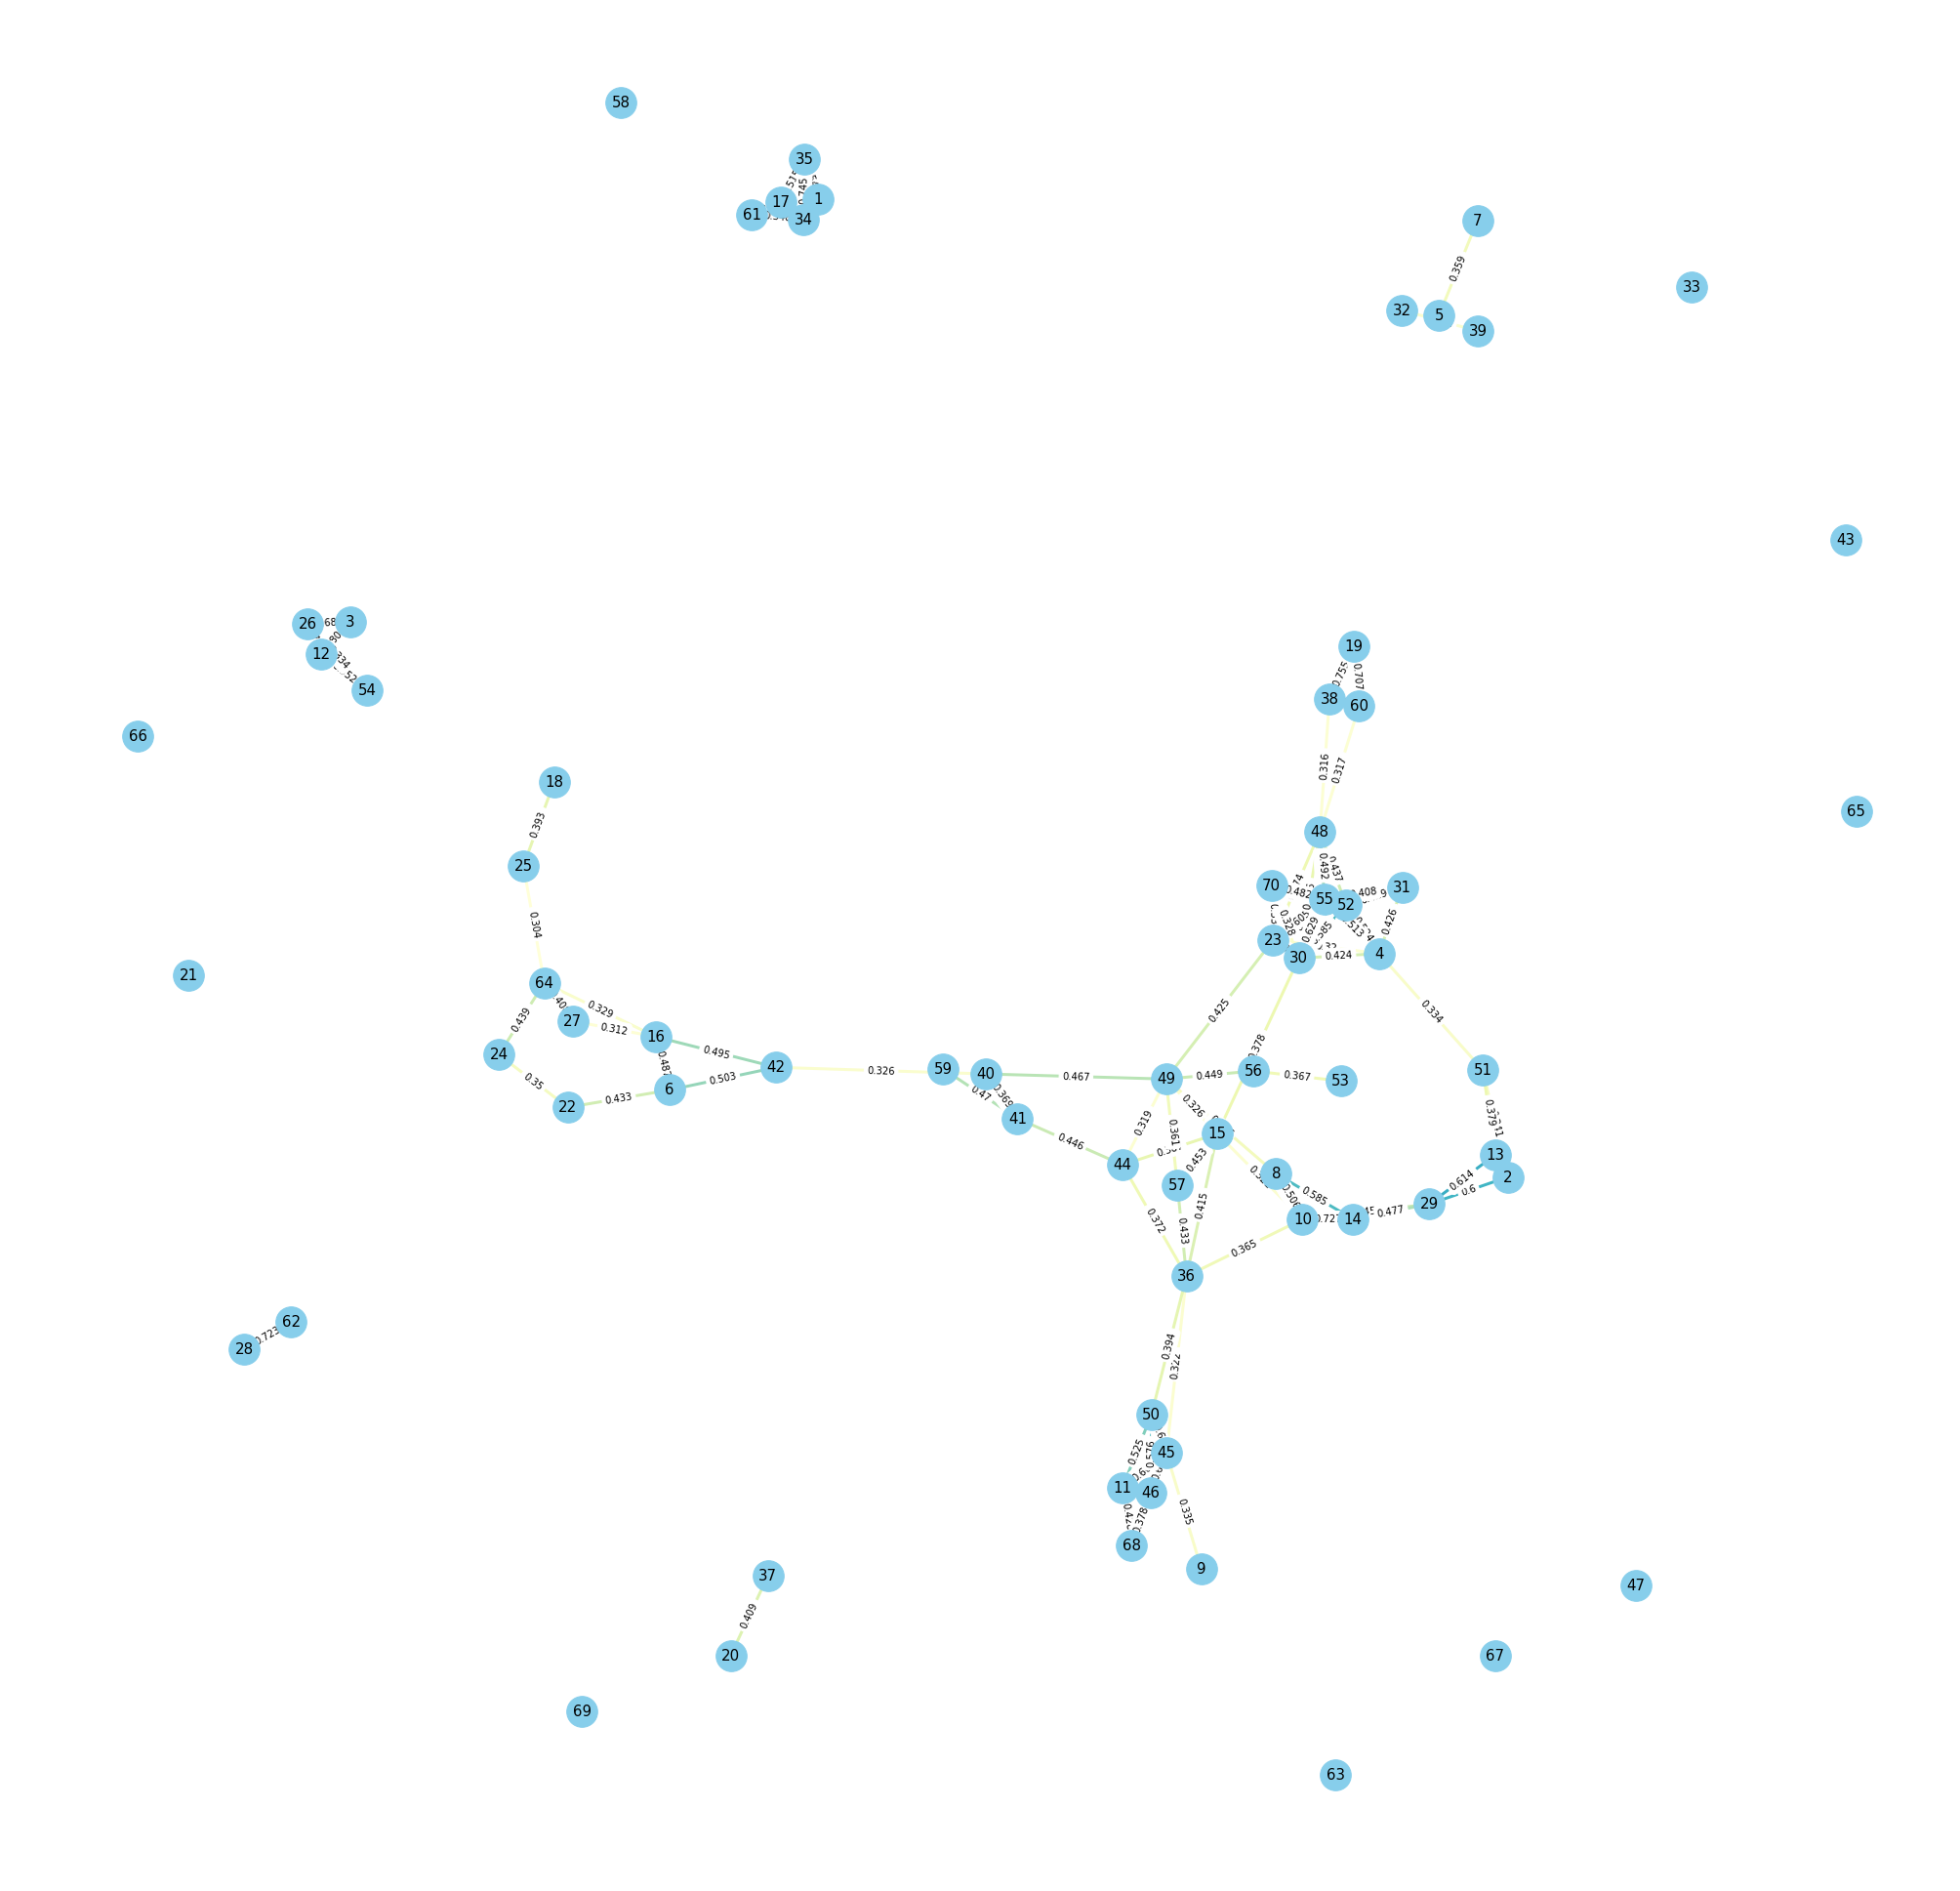

In [7]:
drd87_total_graph = NeuronNetwork(drd87_fe.cell_transients_df)
drd87_total_graph.plot(node_color="skyblue", figsize=(35, 35), node_size=1000)

## DRD77's network for the *entire* duration of the EPM experiment.

You did not provide a neuron position dictionary, so the Spring Layout algorithm will be used to plot the network


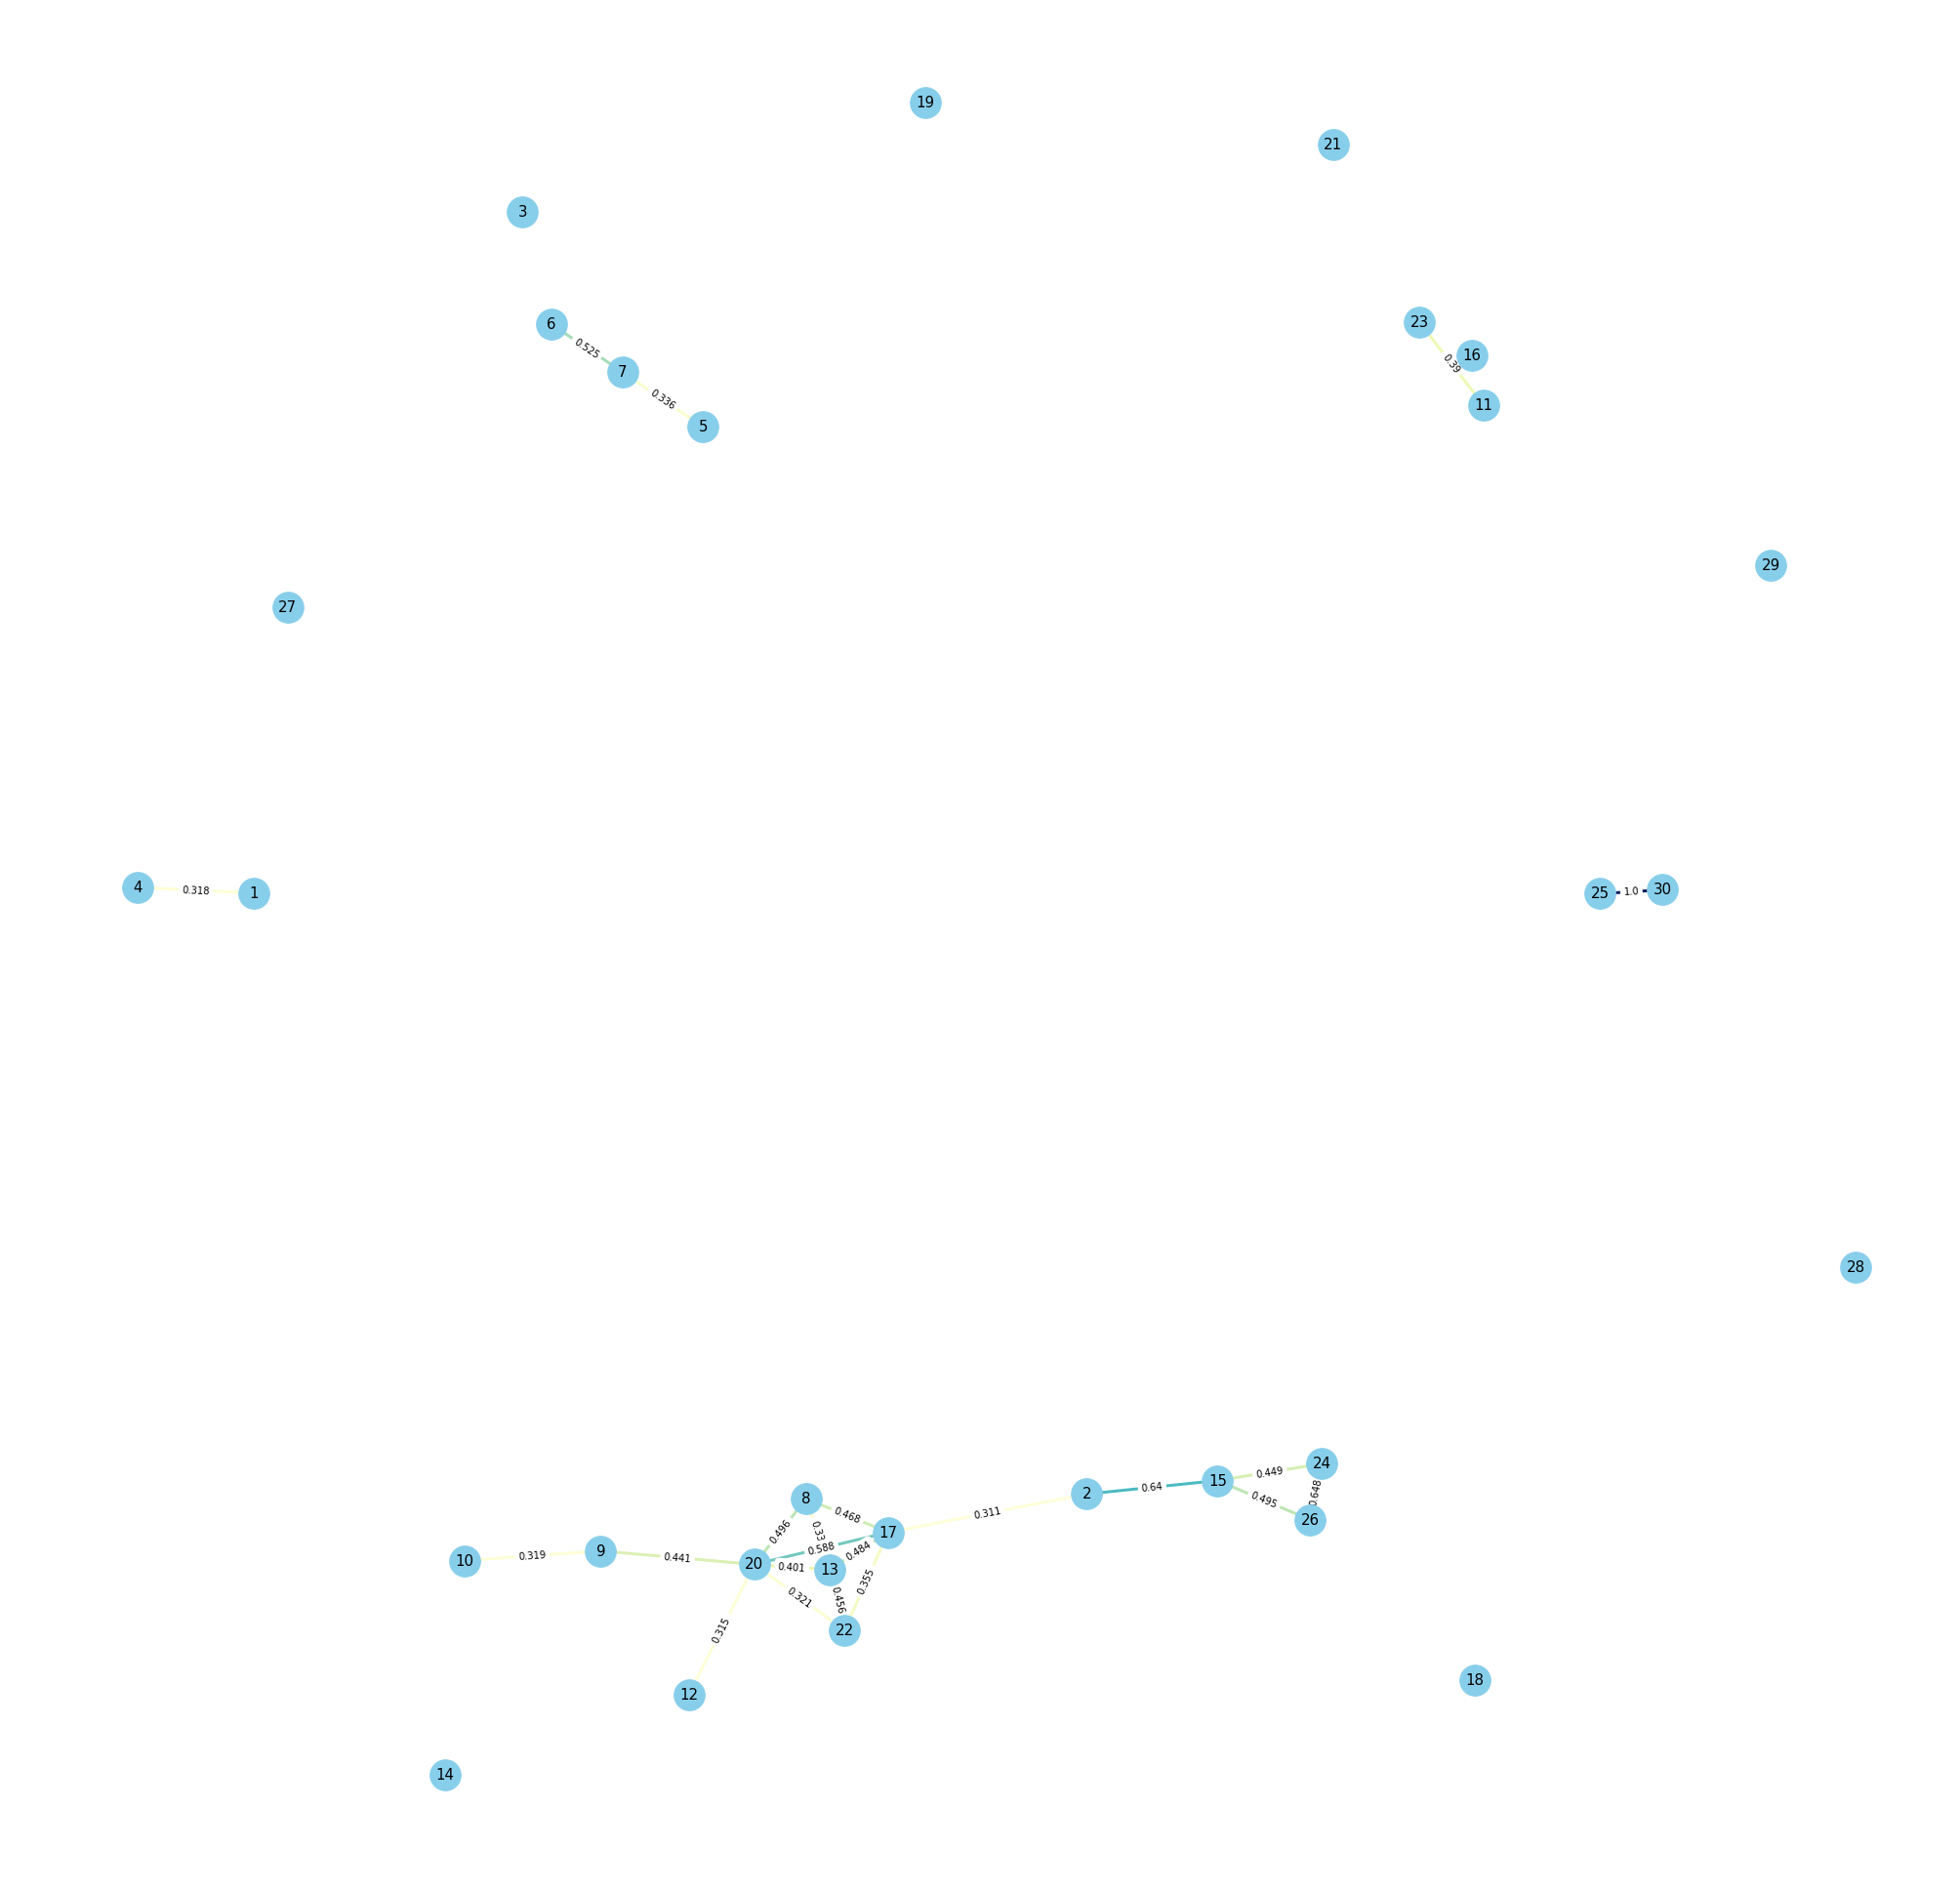

In [8]:
drd77_total_graph = NeuronNetwork(drd77_fe.cell_transients_df)
drd77_total_graph.plot(node_color="skyblue", figsize=(35, 35), node_size=1000)

## DRD73's network for the *entire* duration of the EPM experiment.

You did not provide a neuron position dictionary, so the Spring Layout algorithm will be used to plot the network


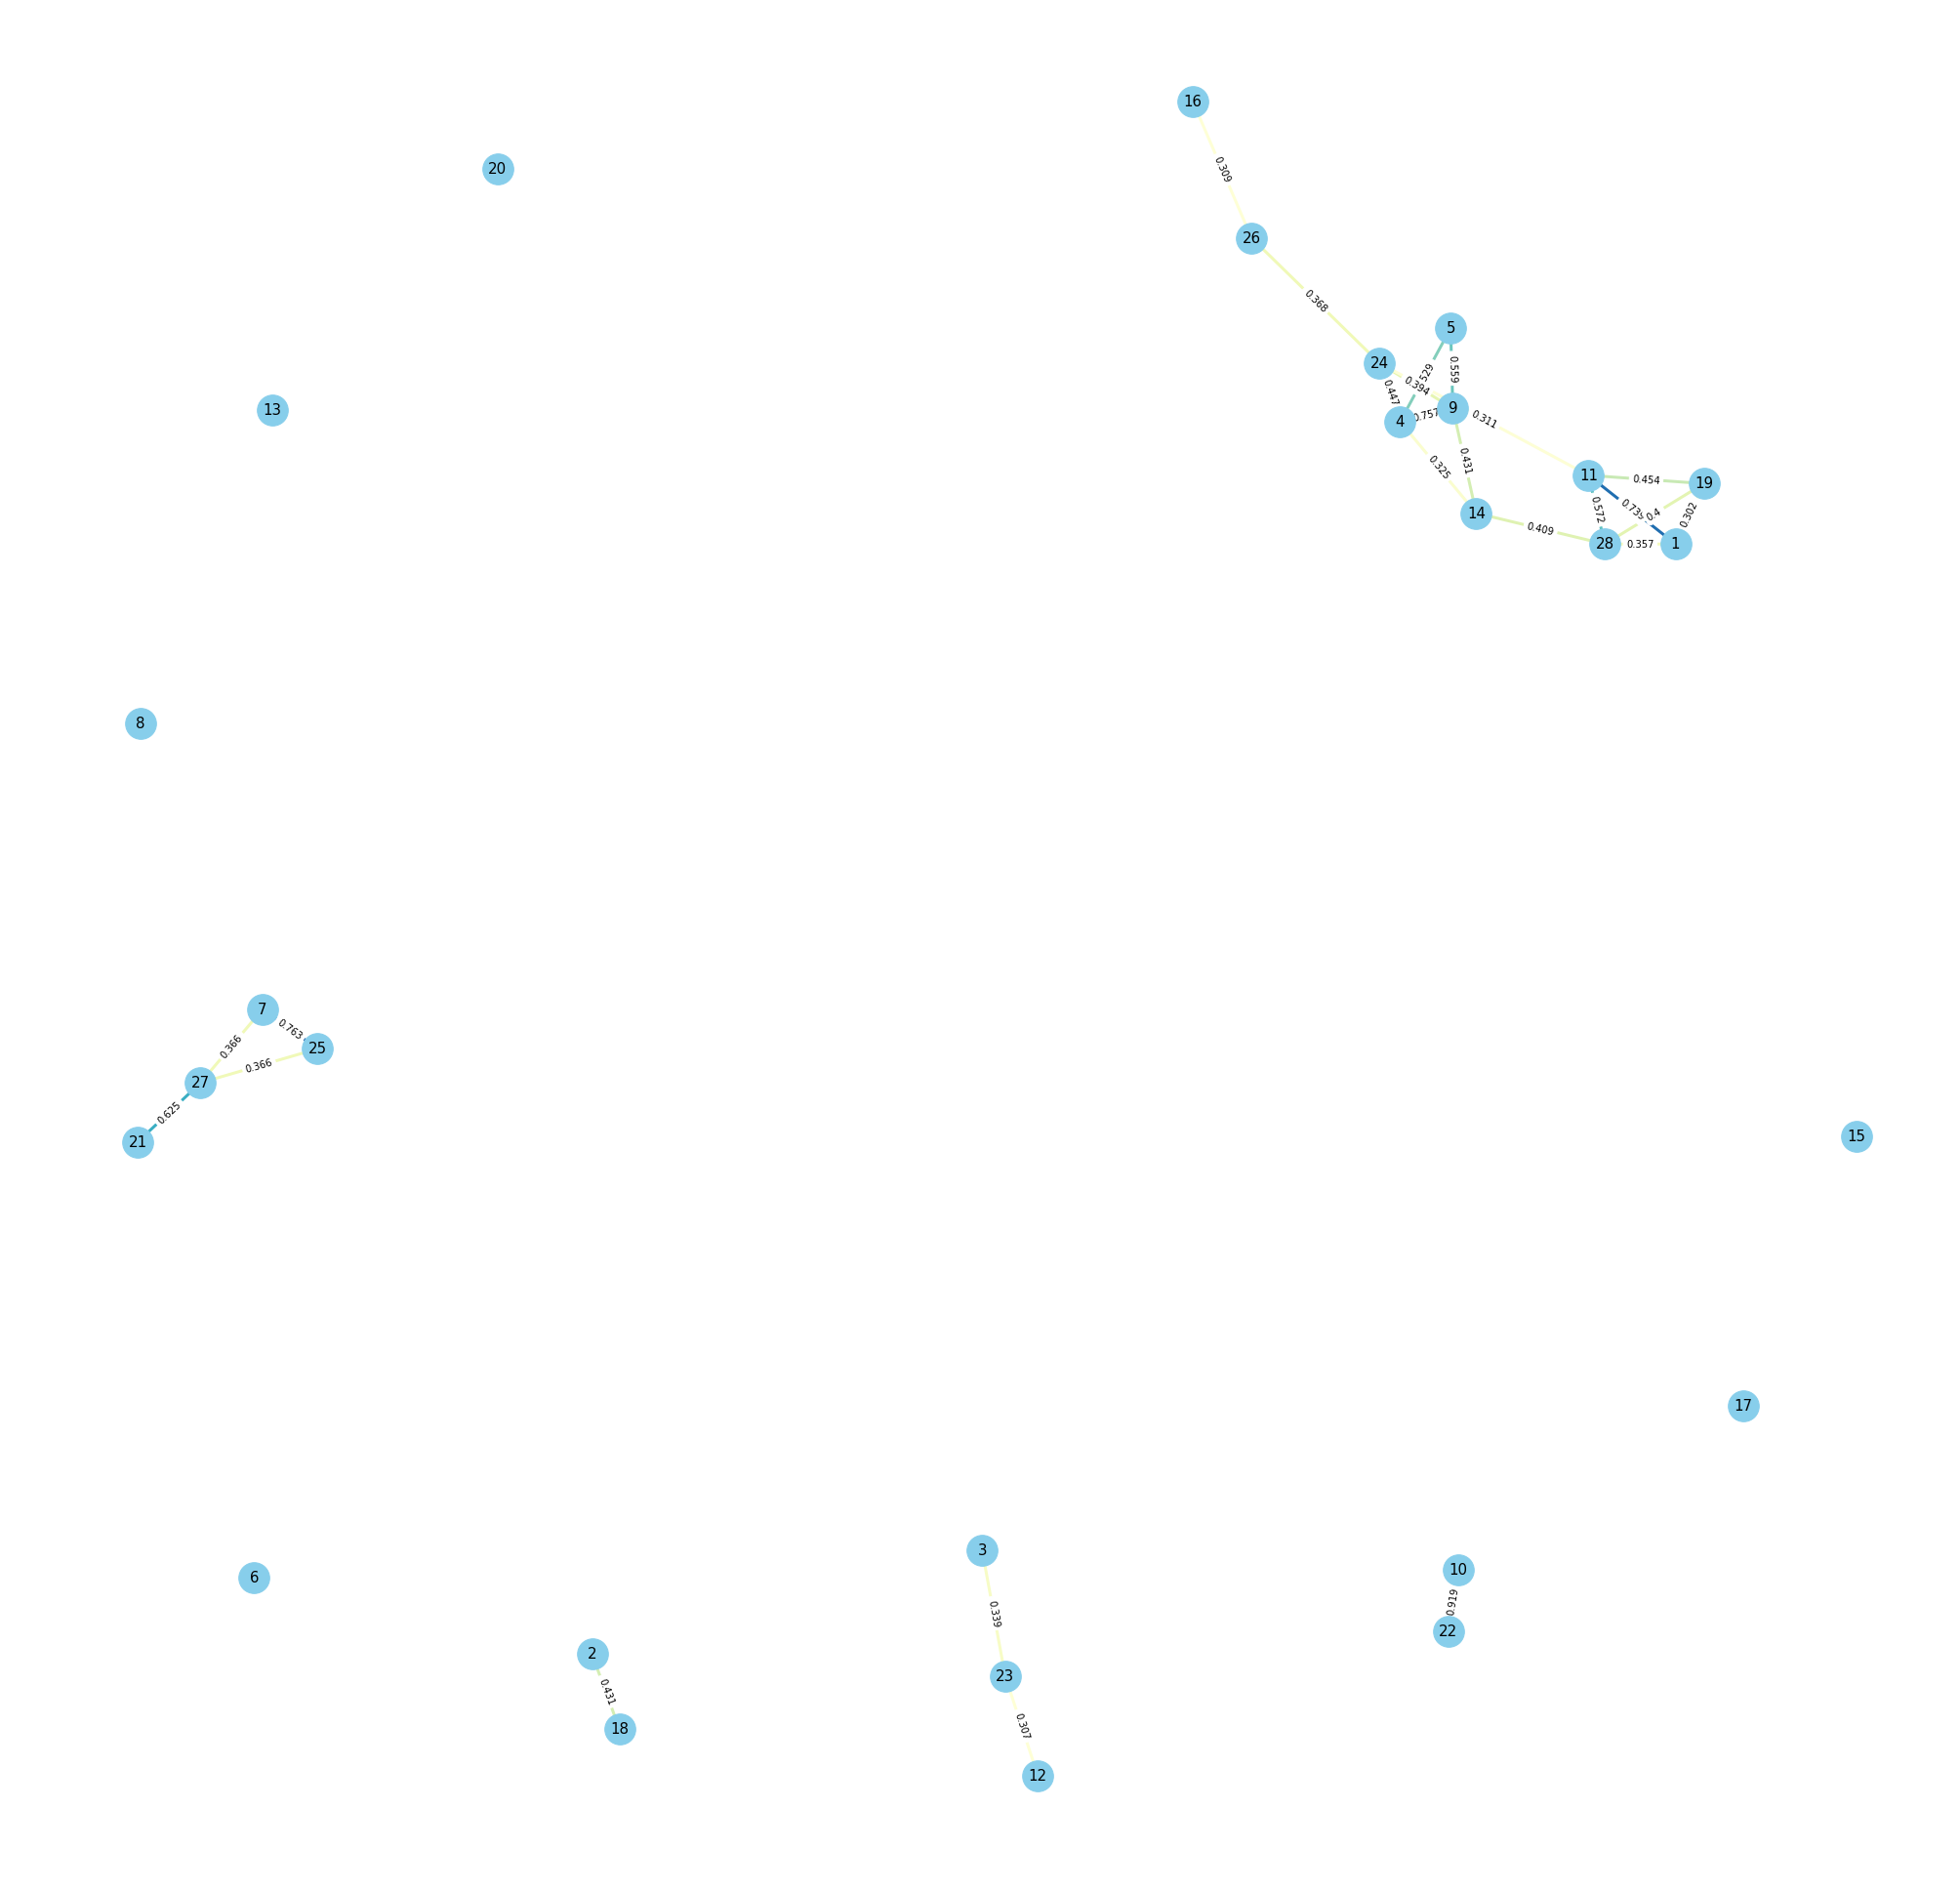

In [9]:
drd73_total_graph = NeuronNetwork(drd73_fe.cell_transients_df)
drd73_total_graph.plot(node_color="skyblue", figsize=(35, 35), node_size=1000)

## DRD87's network during the `OpenArms` of the EPM experiment.

You did not provide a neuron position dictionary, so the Spring Layout algorithm will be used to plot the network


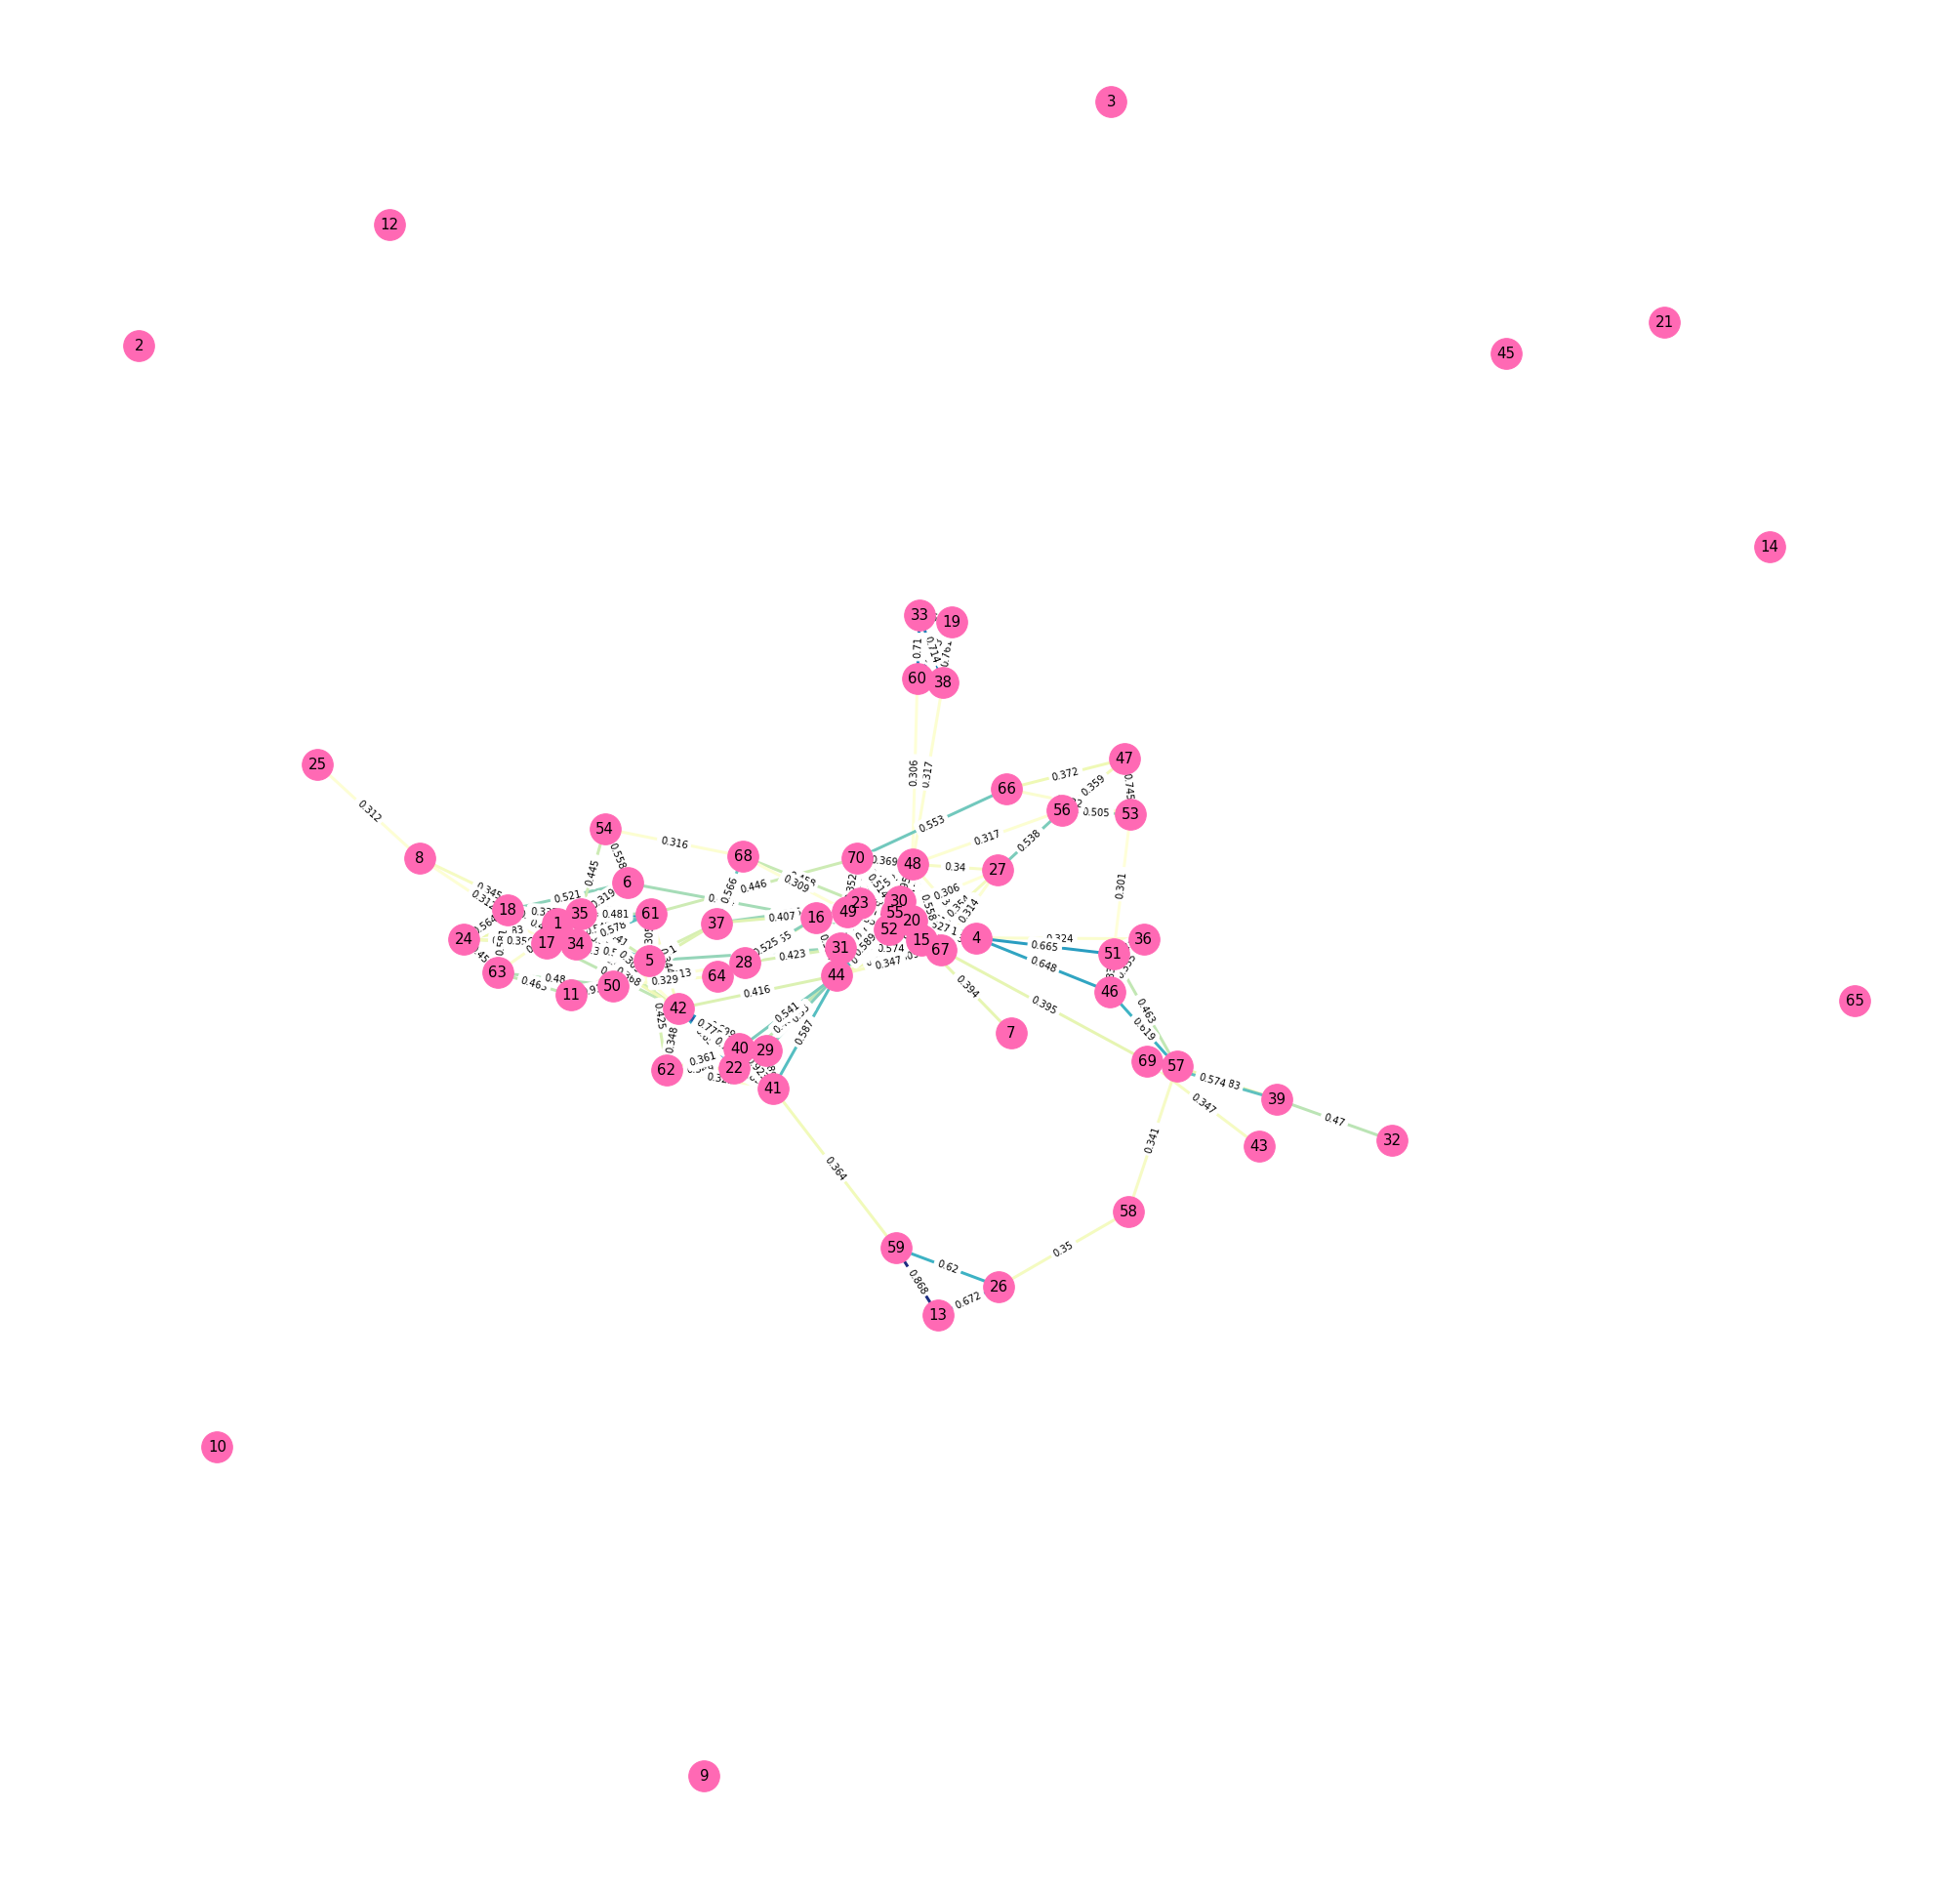

In [10]:
open_arms_indices = drd87_fe.neuron_concated_behavior.loc[drd87_fe.neuron_concated_behavior["OpenArms_centerpoint"] != 0].index
drd87_open_arms_graph = NeuronNetwork(drd87_fe.cell_transients_df.iloc[open_arms_indices])
drd87_open_arms_graph.plot(node_color="hotpink", figsize=(35, 35), node_size=1000)

## DRD87's network during the `ClosedArms` of the EPM experiment.

You did not provide a neuron position dictionary, so the Spring Layout algorithm will be used to plot the network


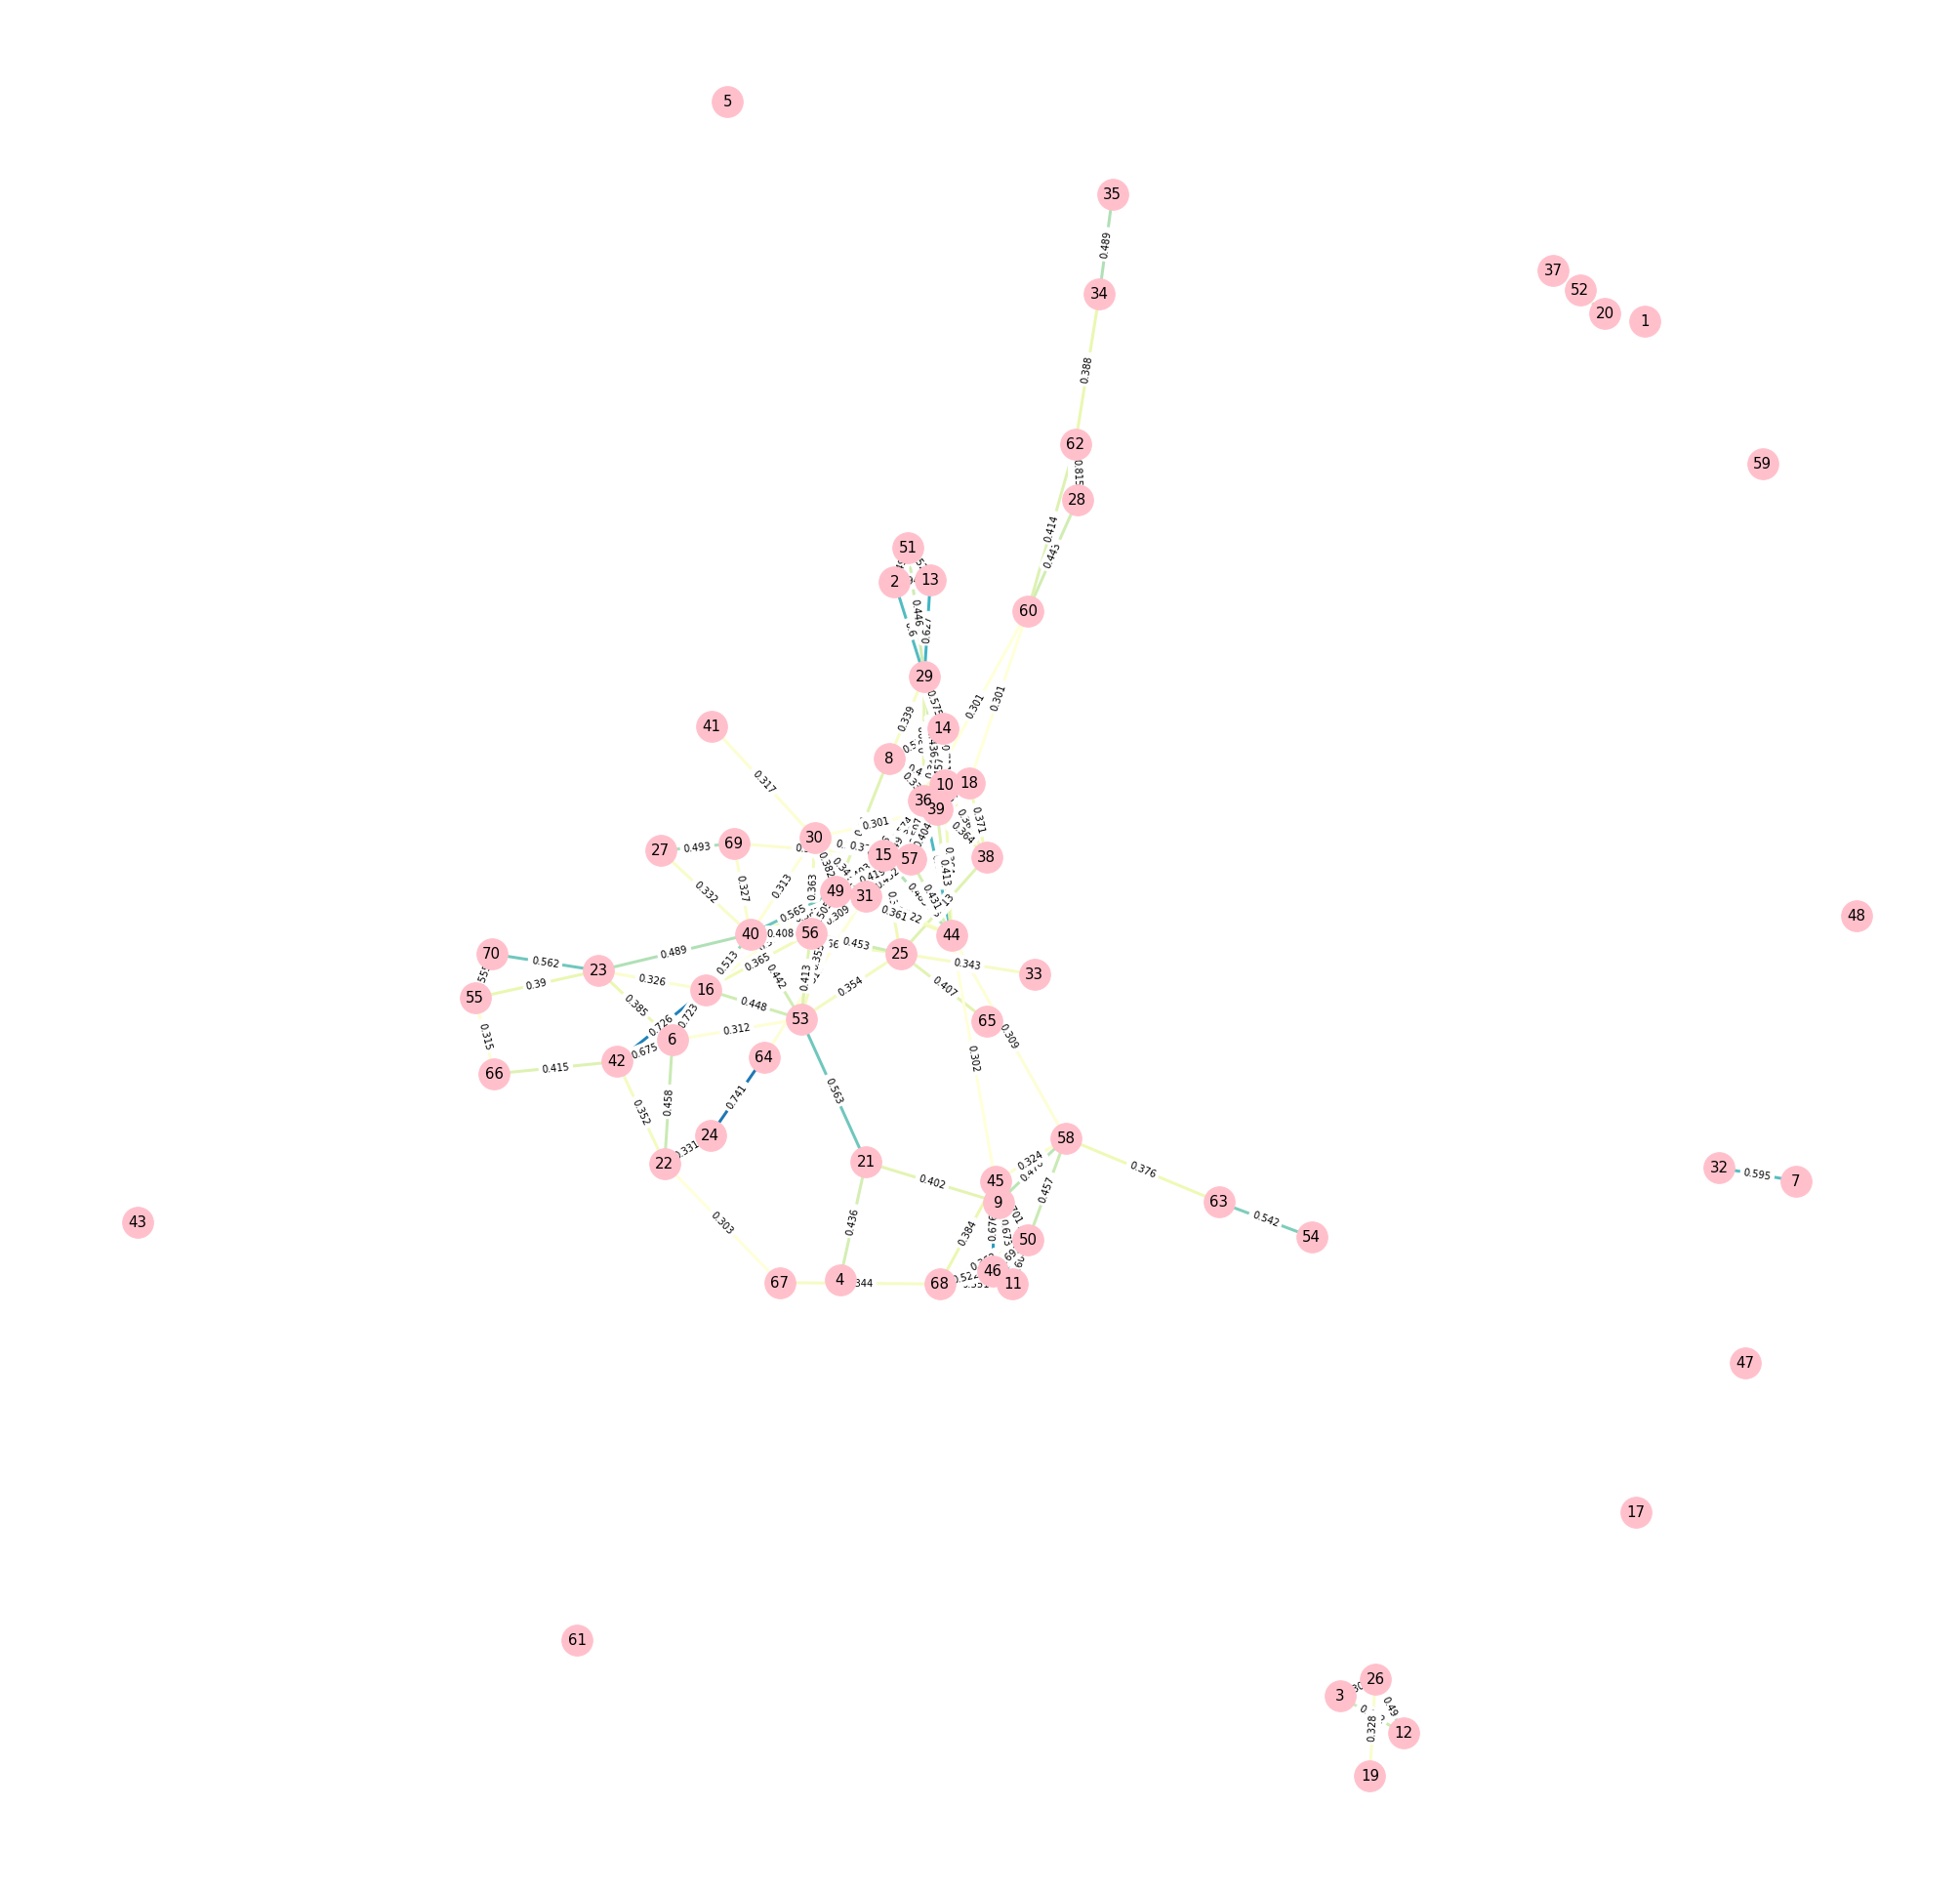

In [11]:
closed_arms_indices = drd87_fe.neuron_concated_behavior.loc[drd87_fe.neuron_concated_behavior["ClosedArms_centerpoint"] != 0].index
drd87_closed_arms_graph = NeuronNetwork(drd87_fe.cell_transients_df.iloc[closed_arms_indices])
drd87_closed_arms_graph.plot(node_color="pink", figsize=(35, 35), node_size=1000)

## DRD77's network during the `OpenArms` of the EPM experiment.

You did not provide a neuron position dictionary, so the Spring Layout algorithm will be used to plot the network


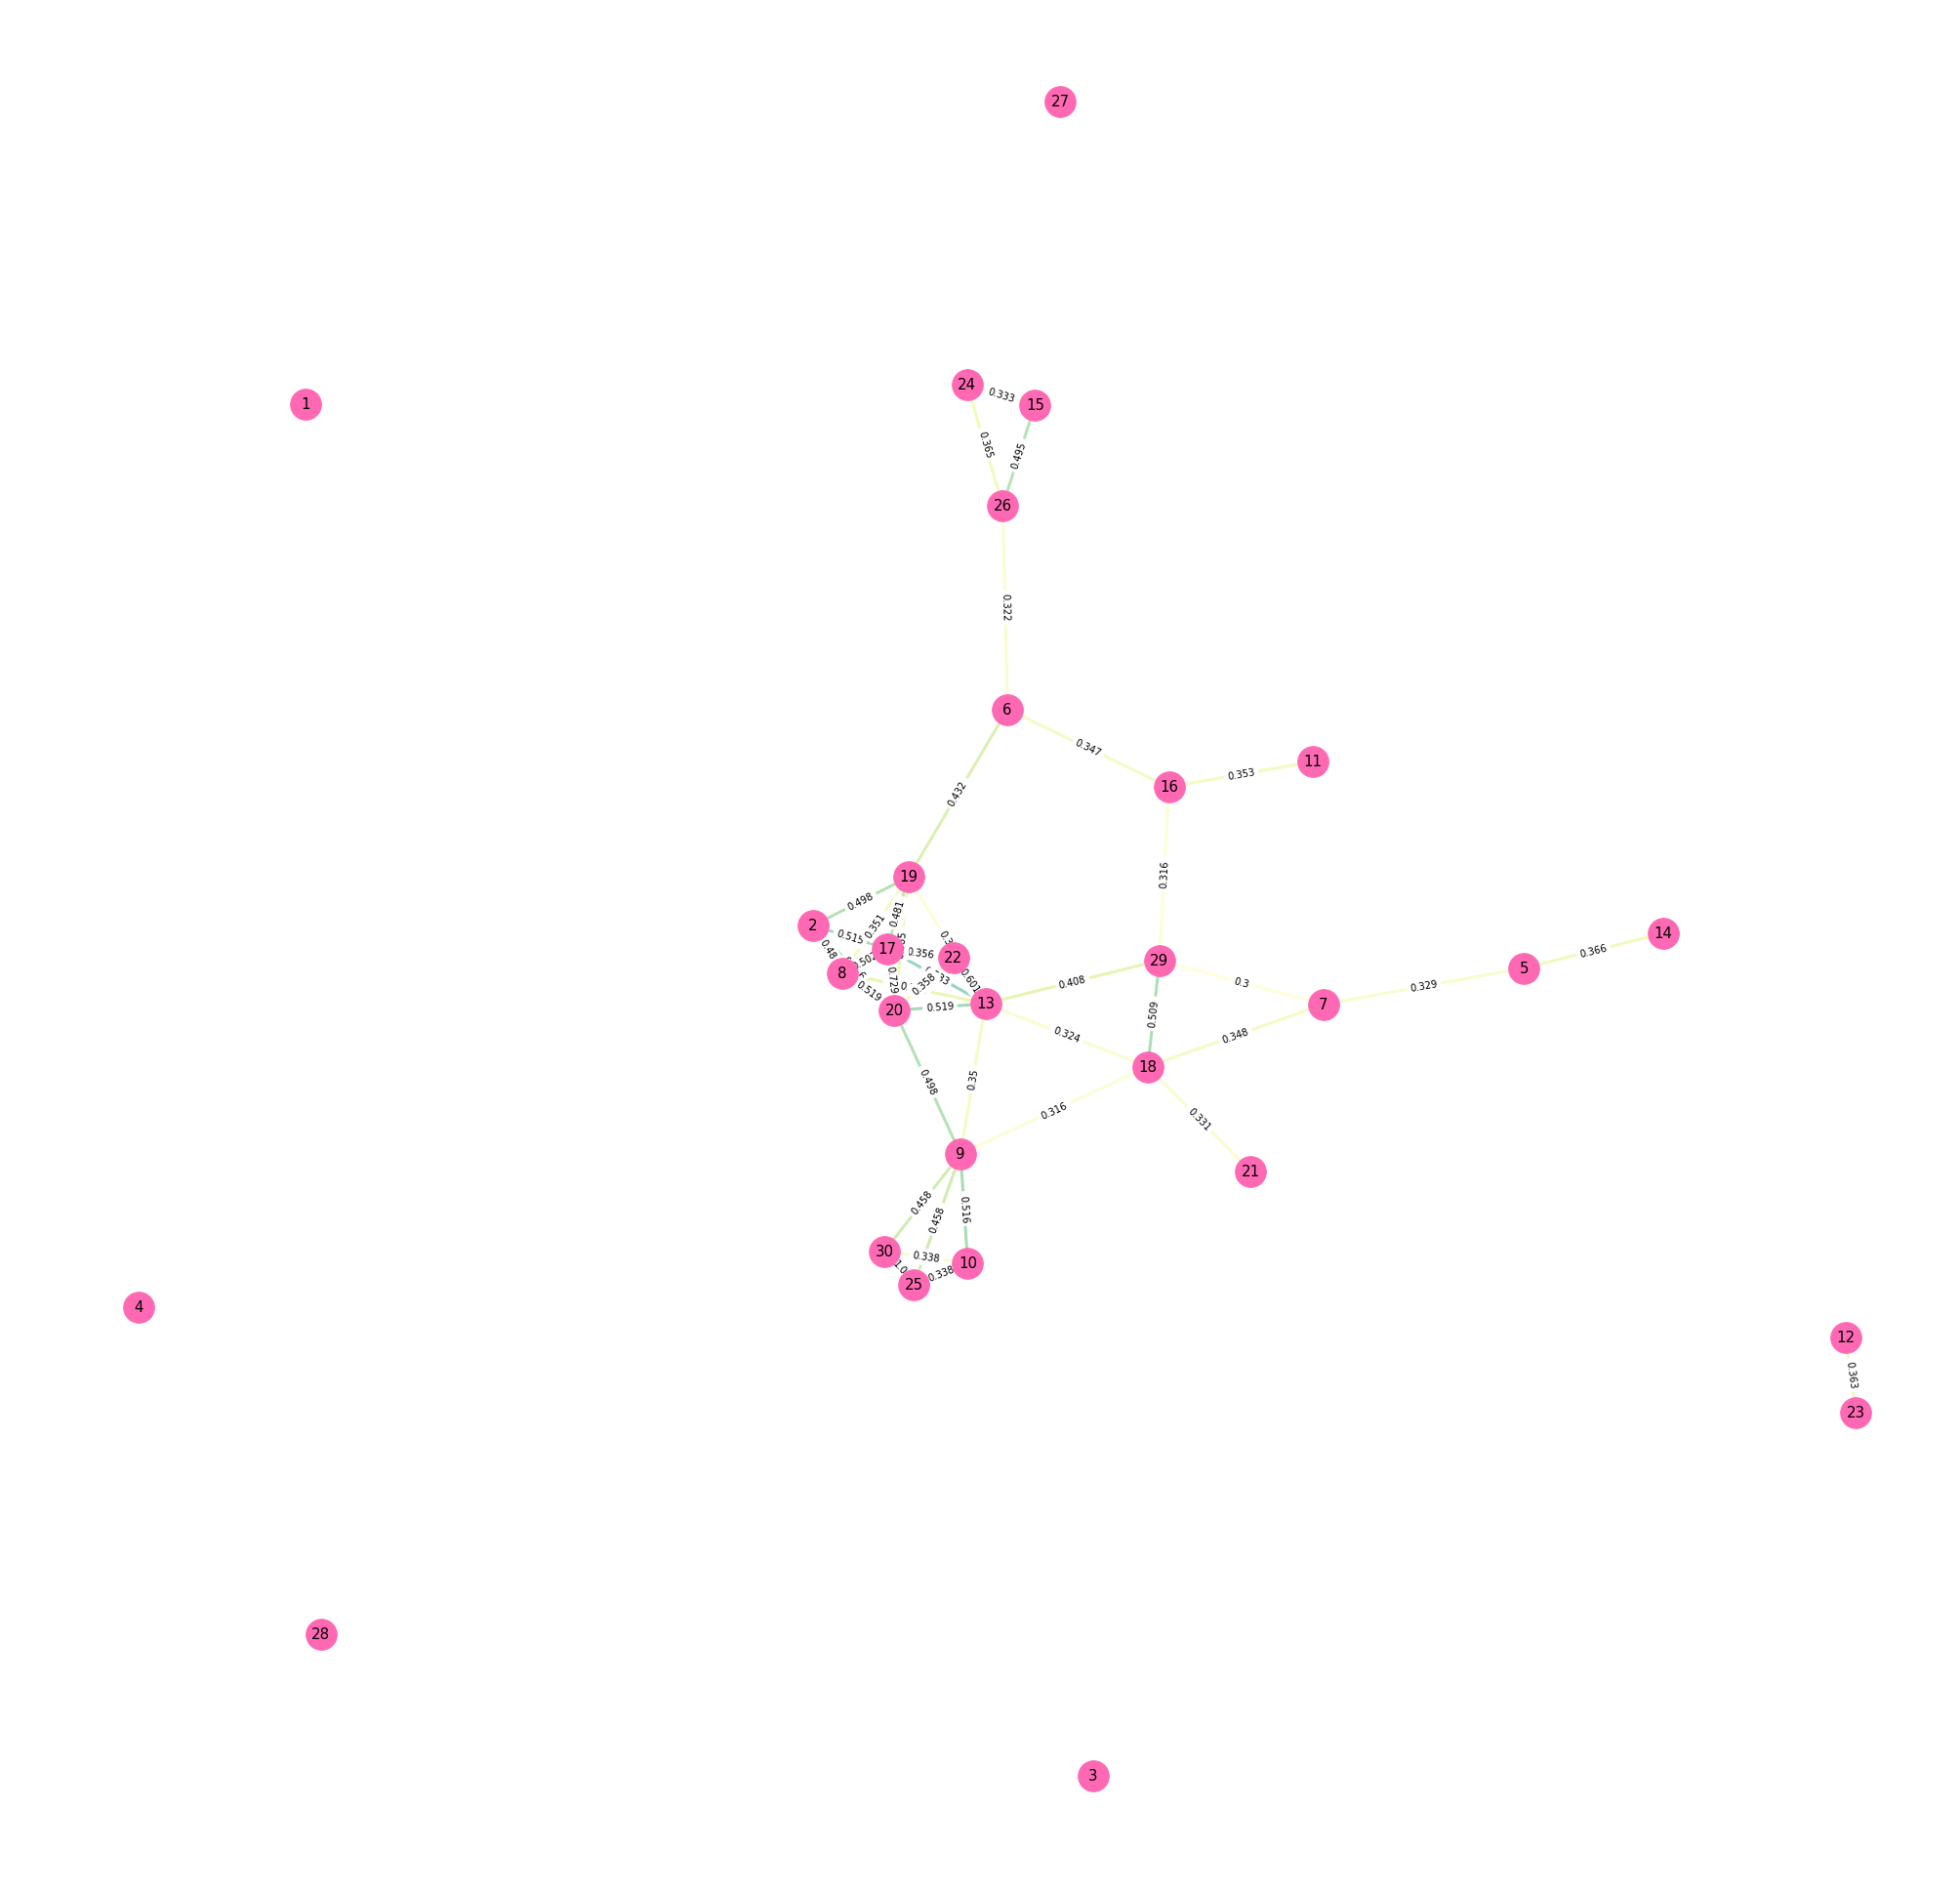

In [12]:
open_arms_indices = drd77_fe.neuron_concated_behavior.loc[drd77_fe.neuron_concated_behavior["OpenArms_centerpoint"] != 0].index
drd77_open_arms_graph = NeuronNetwork(drd77_fe.cell_transients_df.iloc[open_arms_indices])
drd77_open_arms_graph.plot(node_color="hotpink", figsize=(35, 35), node_size=1000)

## DRD77's network during the `ClosedArms` of the EPM experiment.

You did not provide a neuron position dictionary, so the Spring Layout algorithm will be used to plot the network


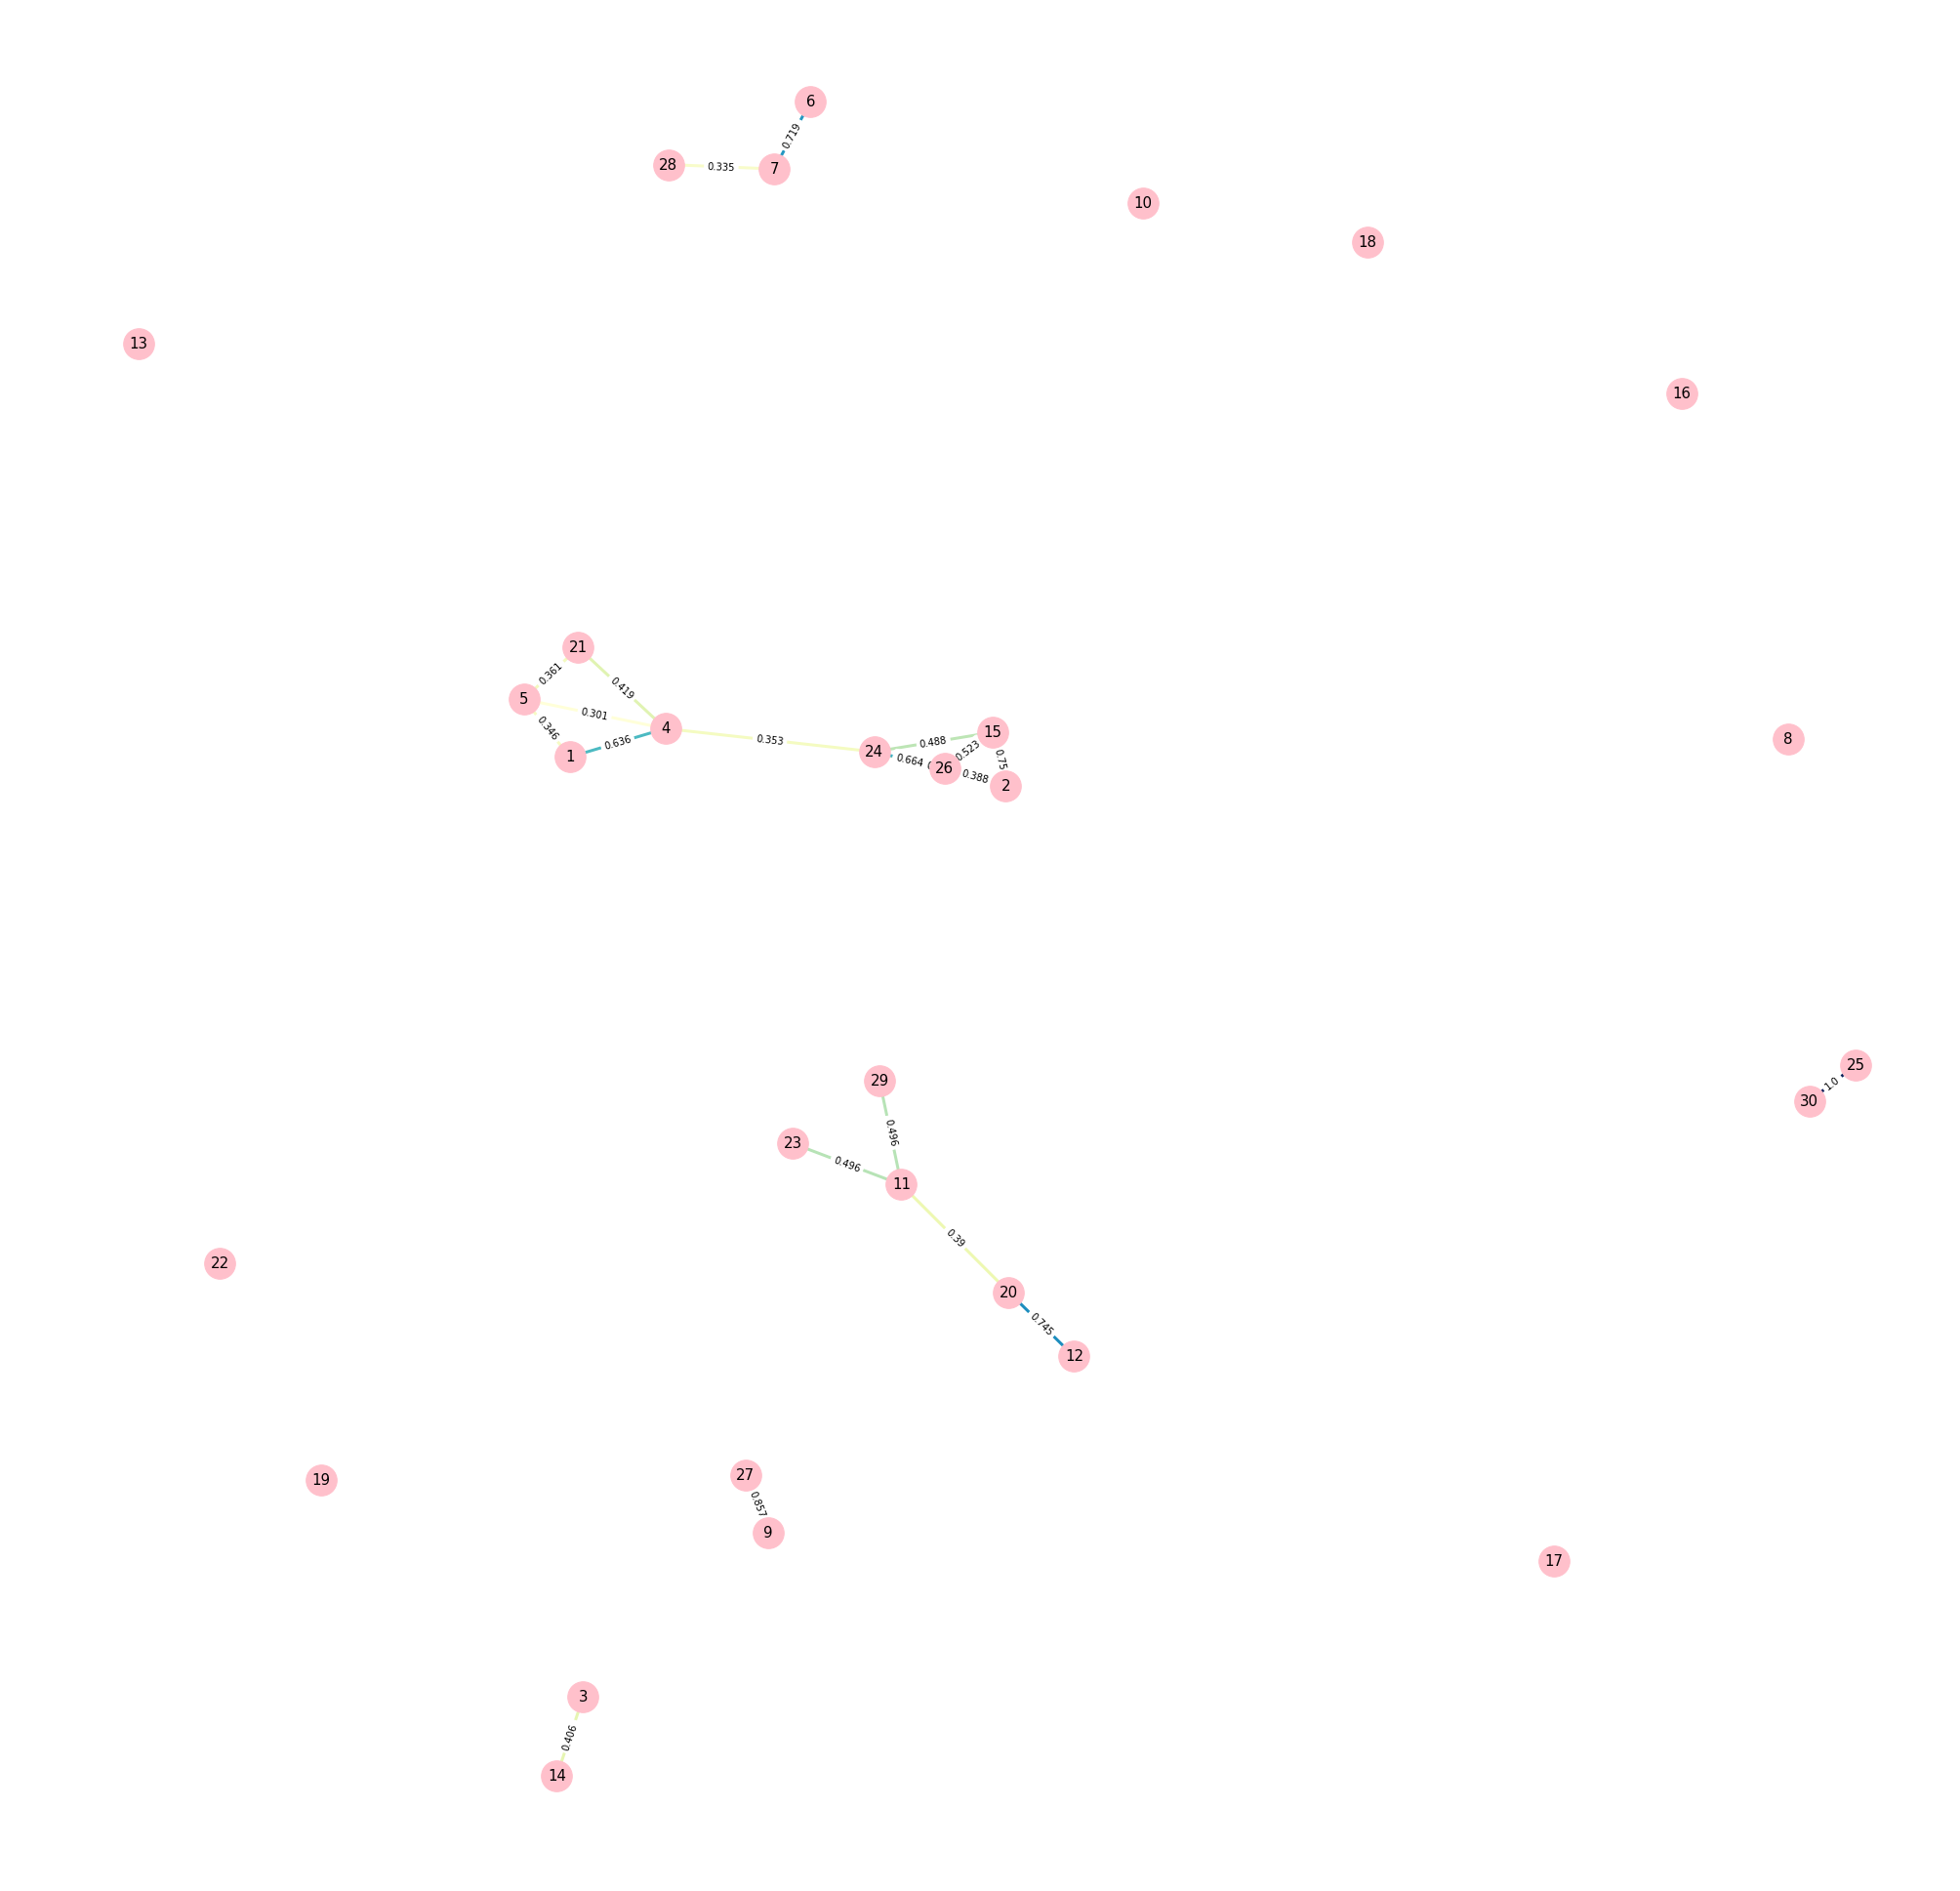

In [13]:
closed_arms_indices = drd77_fe.neuron_concated_behavior.loc[drd77_fe.neuron_concated_behavior["ClosedArms_centerpoint"] != 0].index
drd77_closed_arms_graph = NeuronNetwork(drd77_fe.cell_transients_df.iloc[closed_arms_indices])
drd77_closed_arms_graph.plot(node_color="pink", figsize=(35, 35), node_size=1000)

## DRD73's network during the `OpenArms` of the EPM experiment.

You did not provide a neuron position dictionary, so the Spring Layout algorithm will be used to plot the network


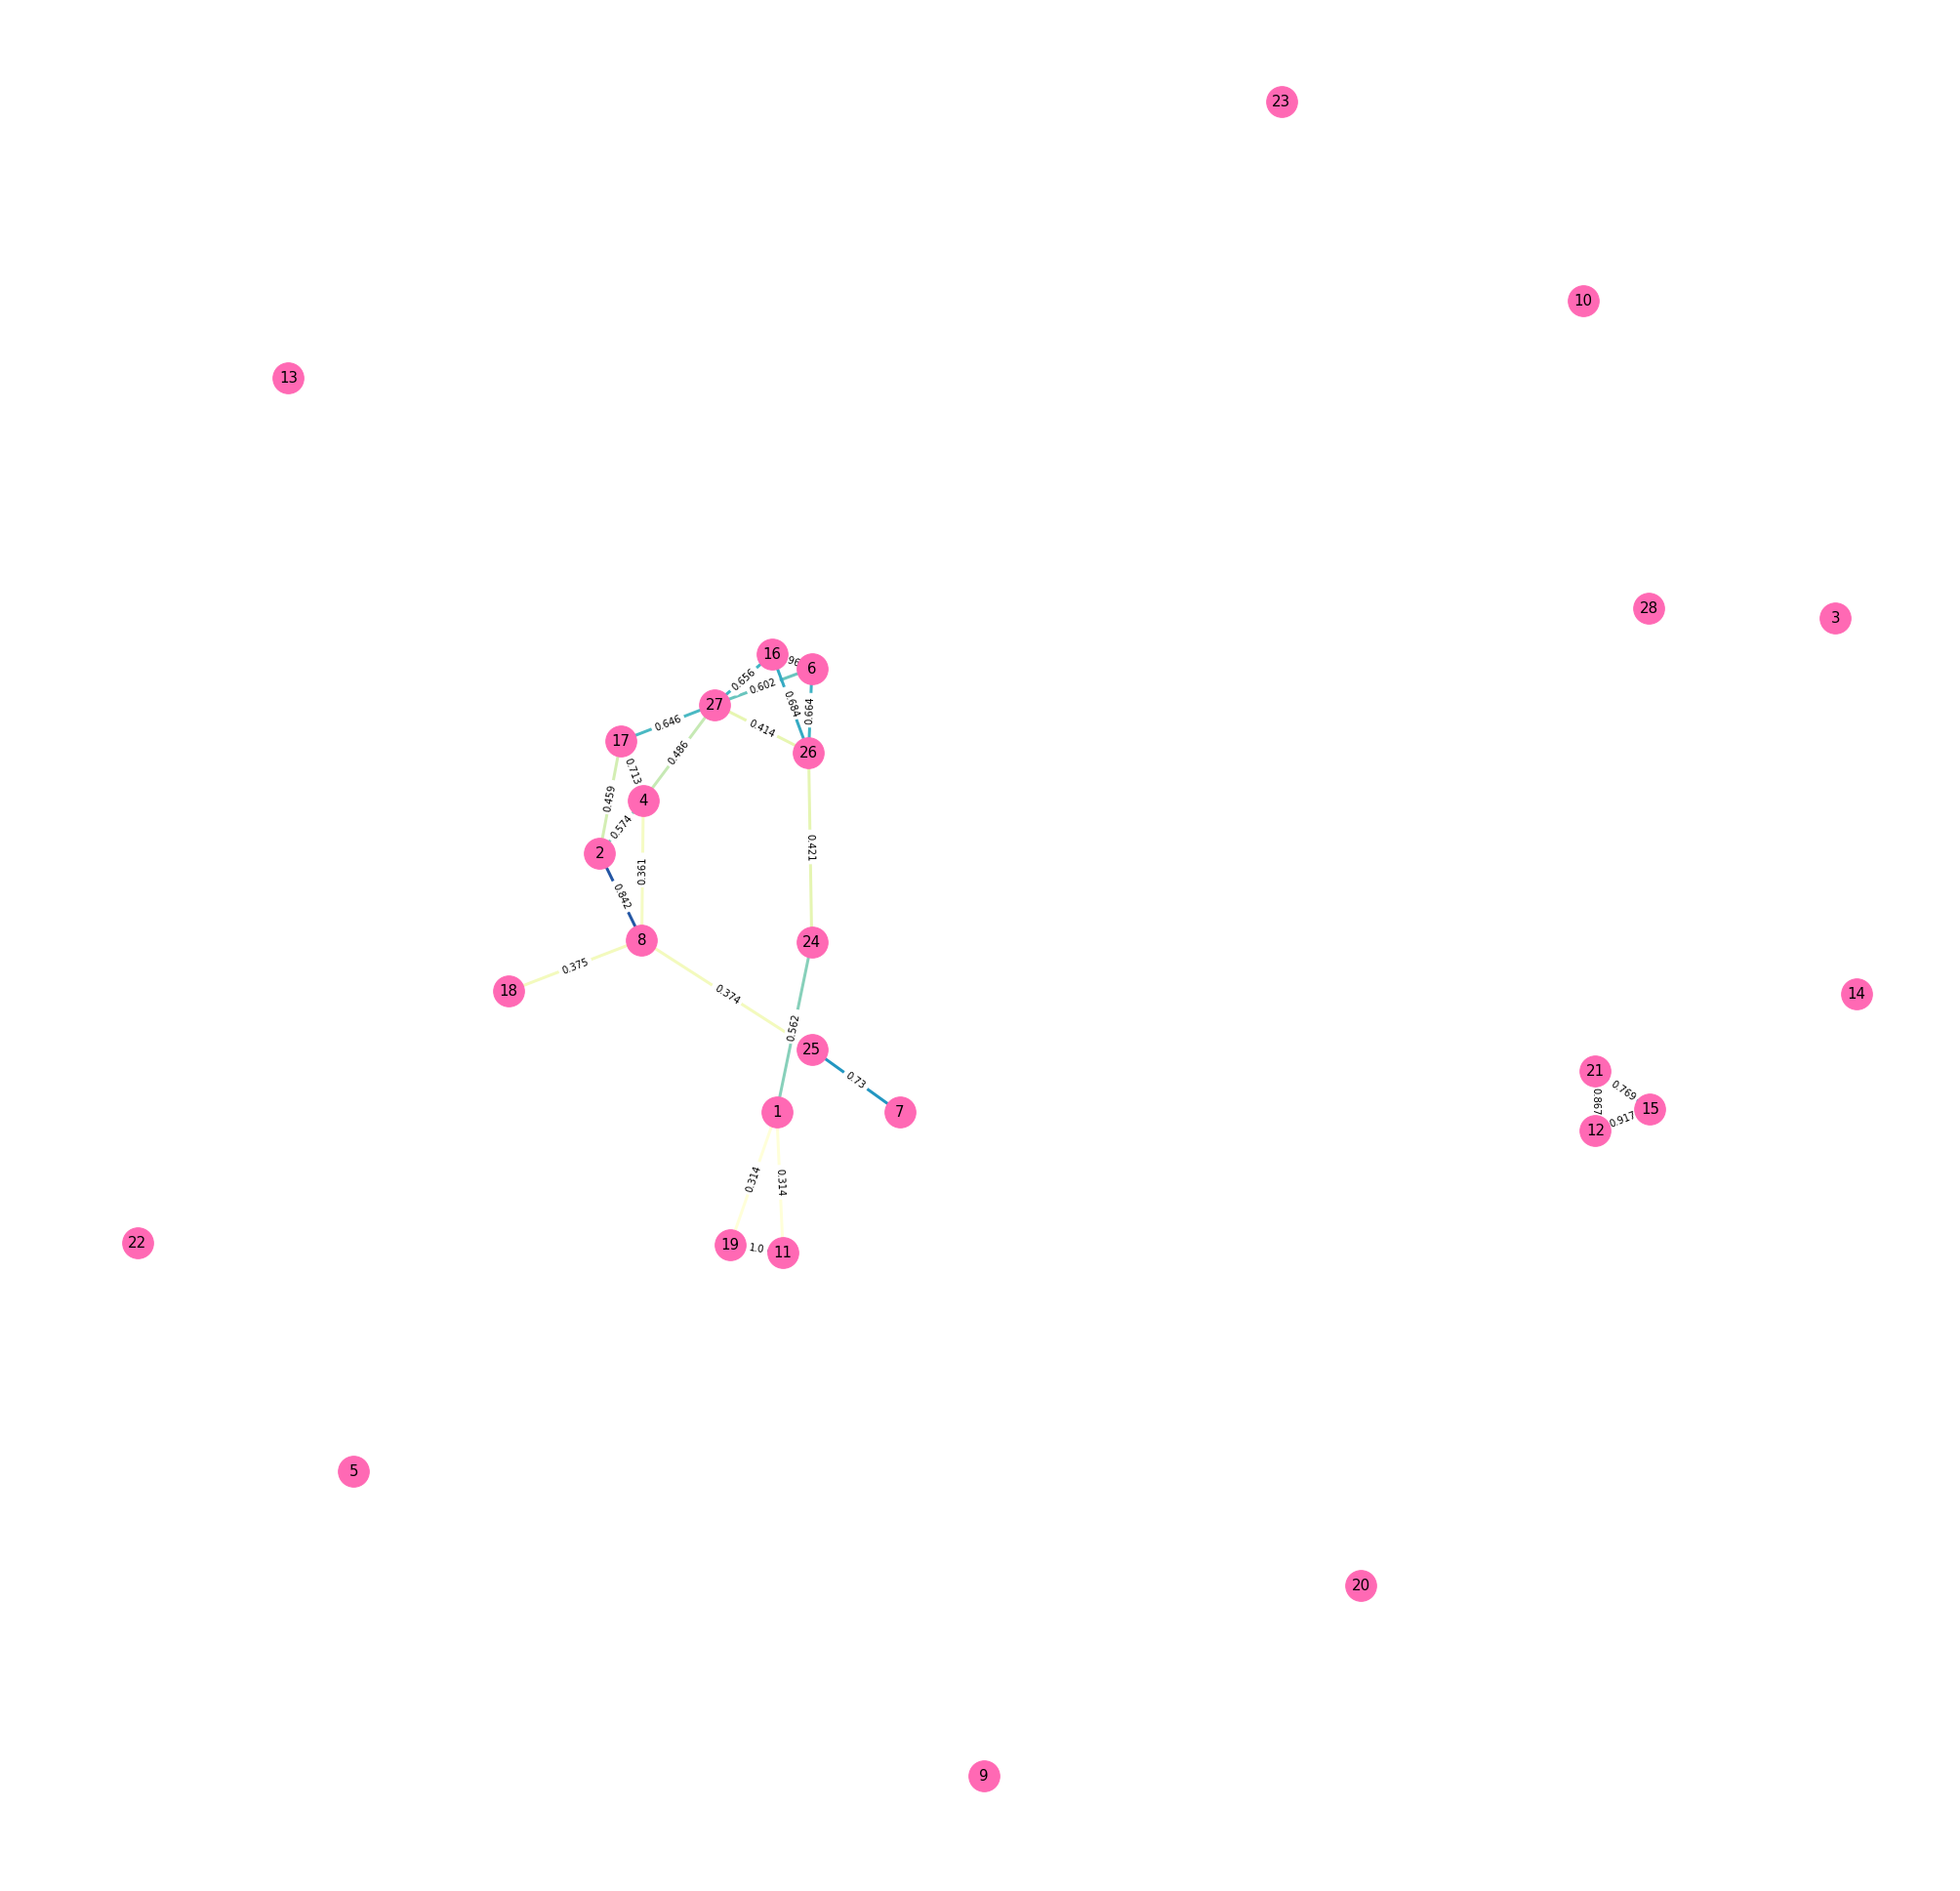

In [14]:
open_arms_indices = drd73_fe.neuron_concated_behavior.loc[drd73_fe.neuron_concated_behavior["OpenArms_centerpoint"] != 0].index
drd73_open_arms_graph = NeuronNetwork(drd73_fe.cell_transients_df.iloc[open_arms_indices])
drd73_open_arms_graph.plot(node_color="hotpink", figsize=(35, 35), node_size=1000)

## DRD73's network during the `ClosedArms` of the EPM experiment.

You did not provide a neuron position dictionary, so the Spring Layout algorithm will be used to plot the network


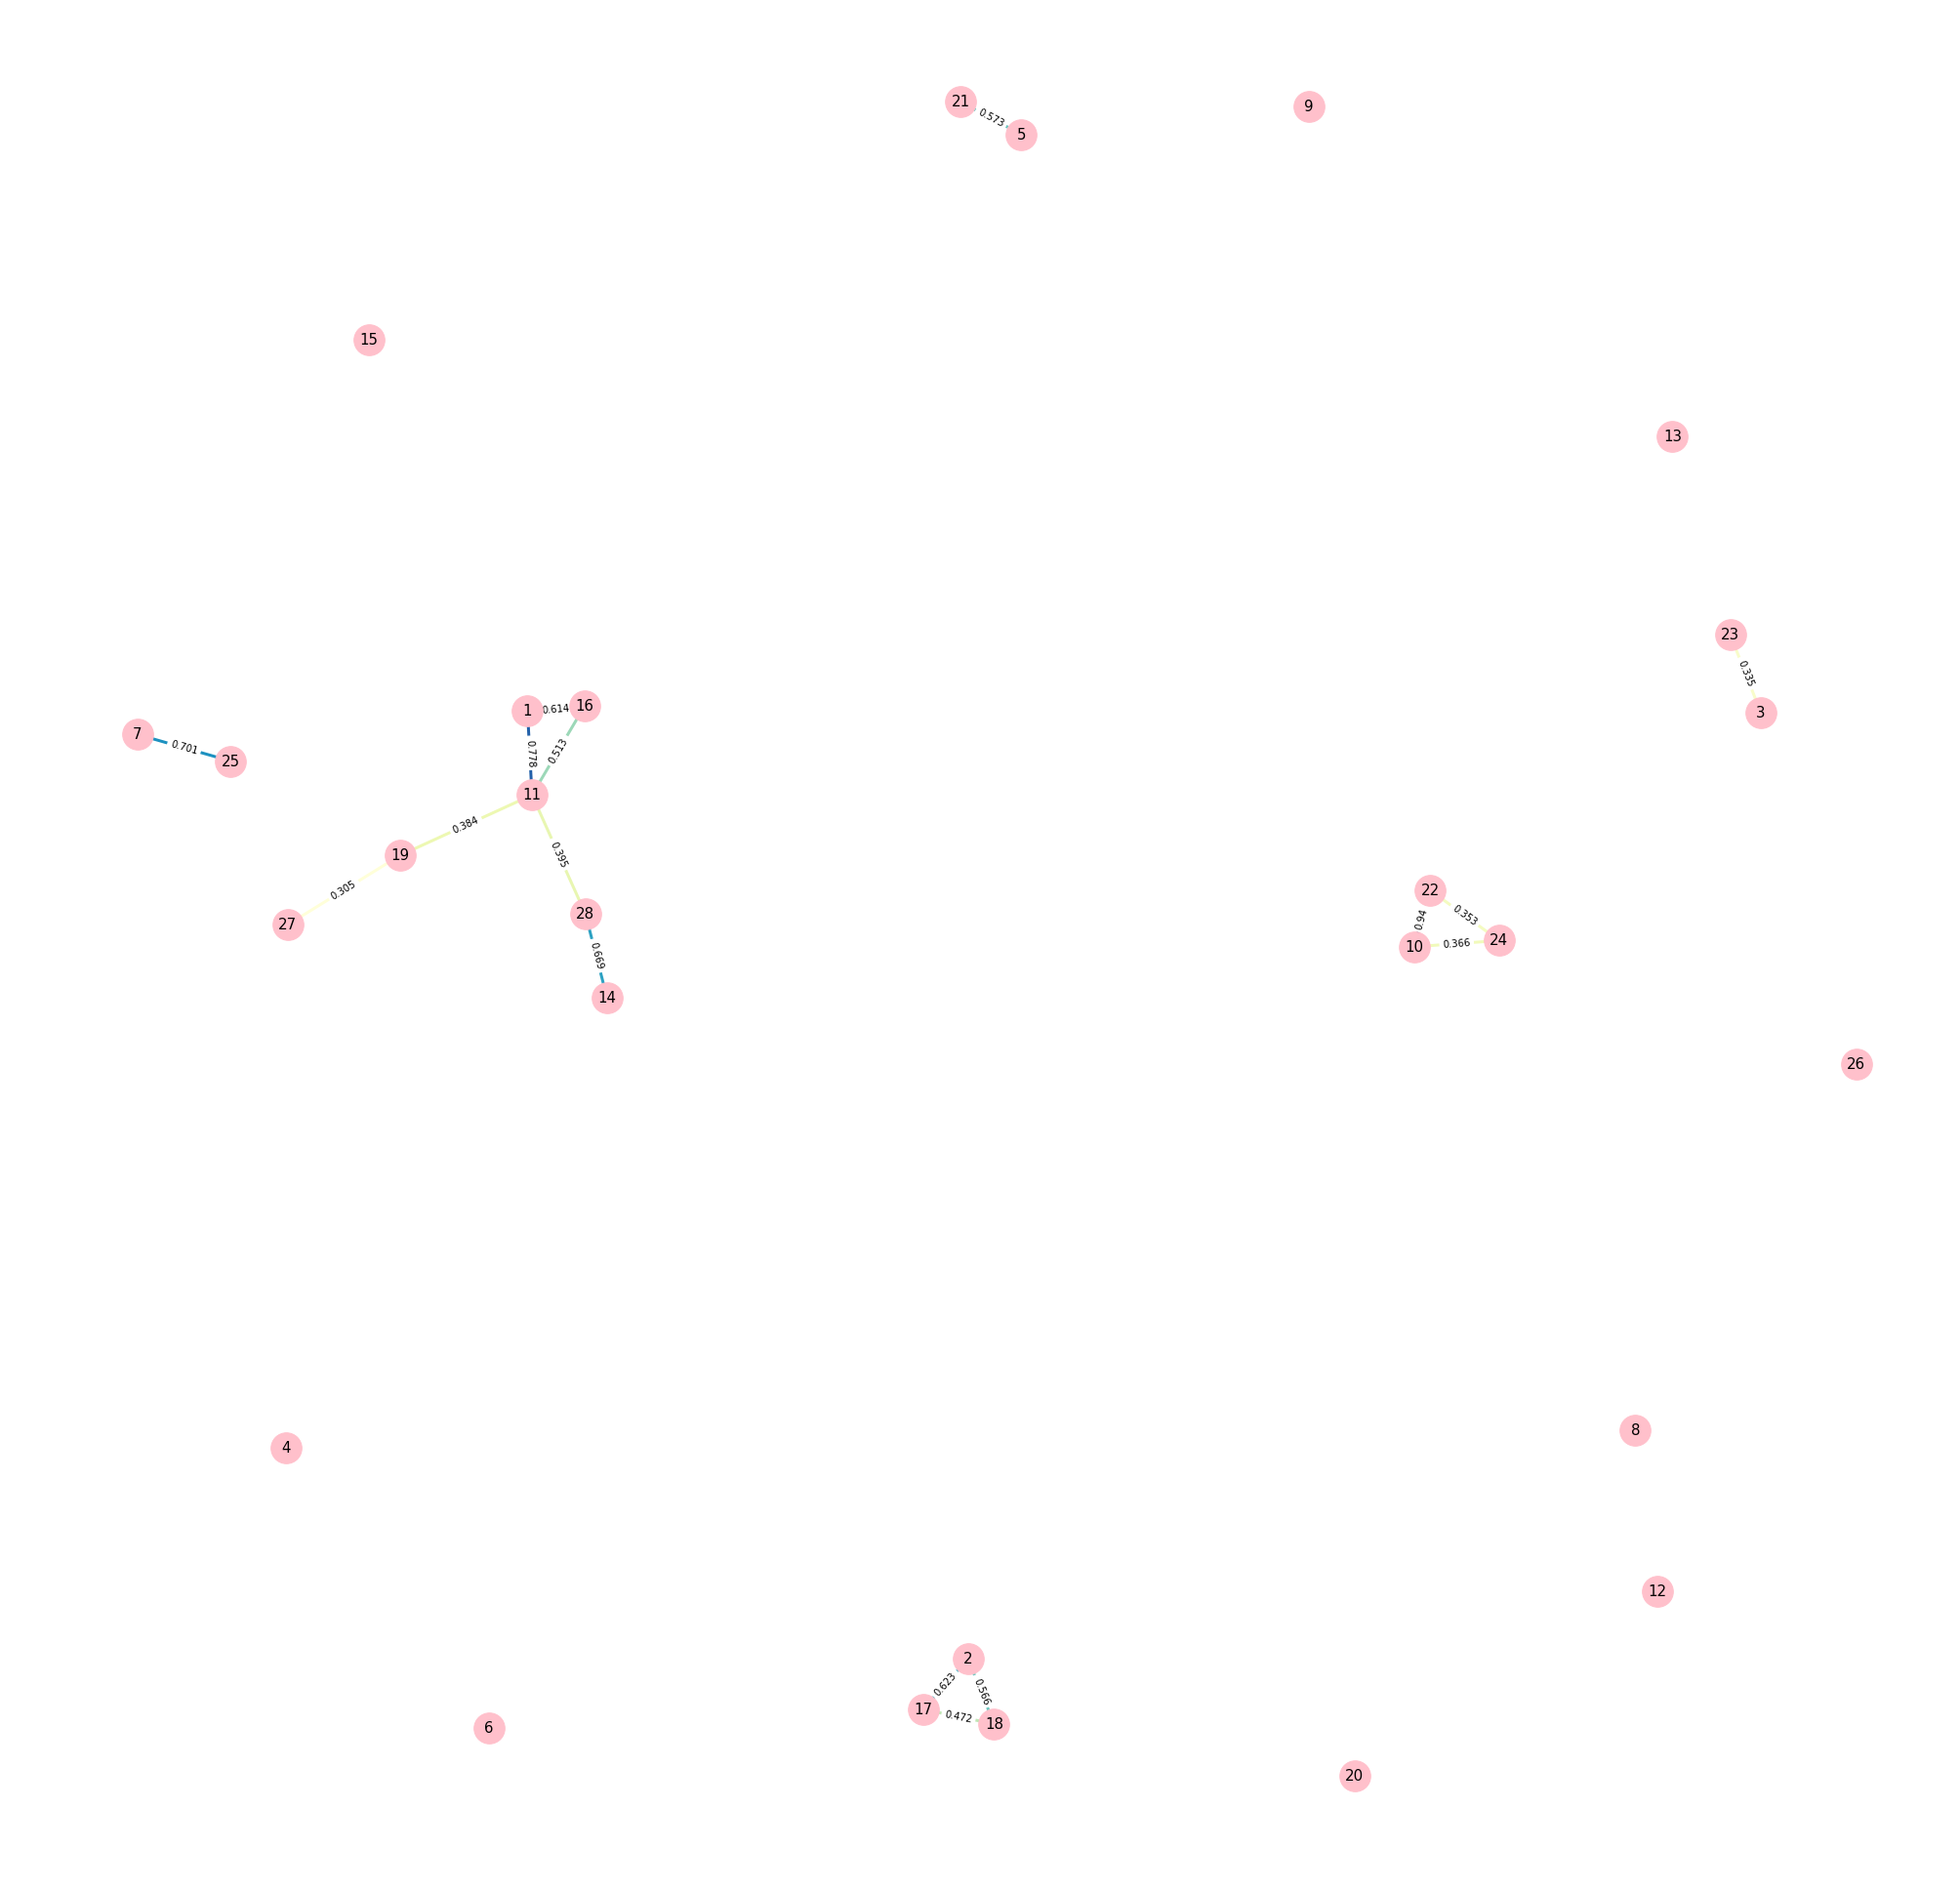

In [15]:
closed_arms_indices = drd73_fe.neuron_concated_behavior.loc[drd73_fe.neuron_concated_behavior["ClosedArms_centerpoint"] != 0].index
drd73_closed_arms_graph = NeuronNetwork(drd73_fe.cell_transients_df.iloc[closed_arms_indices])
drd73_closed_arms_graph.plot(node_color="pink", figsize=(35, 35), node_size=1000)

# Now we compute and plot all of the network measures (of interest), for each mouse.

In [16]:
feature_extractors = [drd87_fe, drd77_fe, drd73_fe]

In [17]:
def get_behavior_graphs(feature_extractors, behavior):
    graphs = list()
    
    for fe_obj in feature_extractors:
        indices = fe_obj.neuron_concated_behavior.loc[fe_obj.neuron_concated_behavior[behavior] != 0].index
        graph = NeuronNetwork(fe_obj.cell_transients_df.iloc[indices])
        graphs.append(graph)
        
    return graphs

In [18]:
import plotly
import plotly.graph_objs as go

def plot_network_measures(y, y2, *animal_names, **kwargs):
    trace1 = go.Bar(
        x=animal_names,
        y=y,
        text=y,
        textposition = "auto",
        name="Open Arms",
        marker=dict(color="rgb(255, 0, 0)"),
        opacity=0.6
    )
    trace2 = go.Bar(
        x=animal_names,
        y=y2,
        text=y2,
        textposition = "auto",
        name="Closed Arms",
        marker=dict(color="rgb(58,200,225)"),
        opacity=0.6
    )
    data = [trace1, trace2]
    layout = go.Layout(
        title = kwargs["title"],
    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

### *Hubs are nodes with high degree, or high centrality. The centrality of a node measures how many of the shortest paths between all other nodes pairs in the network pass through it. A node with high centrality is thus cruciail to efficinet communication.* (Bullmore and Sporns)

### We took take the mean of the degree centrality of all the nodes in the networks of interest. As we can see, the mean degree centrality of the networks is higher when the mice were in the open arms of the EPM.

In [19]:
open_arms_graphs = get_behavior_graphs(feature_extractors, "OpenArms_centerpoint")

open_measures = list()
for open_arms_graph in open_arms_graphs:
    open_measures.append(open_arms_graph.mean_degree_centrality)    
    
closed_arms_graphs = get_behavior_graphs(feature_extractors, "ClosedArms_centerpoint")

closed_measures = list()
for closed_arms_graph in closed_arms_graphs:
    closed_measures.append(closed_arms_graph.mean_degree_centrality) 

x_axis = ["DRD87", "DRD77", "DRD73"]
plot_network_measures(open_measures, closed_measures, *x_axis, title="Mean Degree Centrality")

### *Connection density is the actual number of edges in the graph as a proportion of the total number of possible edges and is the simplest estimator of the physical cost — for example, the energy or other resource requirements — of a network.* (Bullmore and Sporns)

### As one would expect, the connection density is greater when the mice were in the open arms of the EPM.

In [20]:
open_arms_graphs = get_behavior_graphs(feature_extractors, "OpenArms_centerpoint")

open_measures = list()
for open_arms_graph in open_arms_graphs:
    open_measures.append(open_arms_graph.connection_density)    
    
closed_arms_graphs = get_behavior_graphs(feature_extractors, "ClosedArms_centerpoint")

closed_measures = list()
for closed_arms_graph in closed_arms_graphs:
    closed_measures.append(closed_arms_graph.connection_density) 

plot_network_measures(open_measures, closed_measures, *x_axis, title="Connection Density")

### *If the nearest neighbors of a node are also directly connected to each other they form a cluster. The clustering coefficient quantifies the number of connections that exist between the nearest neighbors of a node as a proportion of the maximum number of possible connections. Random networks have lowe average clustering whereas complex networks have high clustering (associated with high local efficiency of information transfer and robustness).* (Bullmore and Sporns)

### As shown below, the clustering coefficient for all the networks was greater when the mice were in the open arms of the EPM.

In [21]:
open_arms_graphs = get_behavior_graphs(feature_extractors, "OpenArms_centerpoint")

open_measures = list()
for open_arms_graph in open_arms_graphs:
    open_measures.append(open_arms_graph.clustering_coefficient)    
    
closed_arms_graphs = get_behavior_graphs(feature_extractors, "ClosedArms_centerpoint")

closed_measures = list()
for closed_arms_graph in closed_arms_graphs:
    closed_measures.append(closed_arms_graph.clustering_coefficient) 

plot_network_measures(open_measures, closed_measures, *x_axis, title="Clustering Coefficient")

### *The 'small-world' property combines high levels of local clustering among nodes of a network (to form families or cliques) and short paths that globally link all nodes of a network. This means that all nodes of a large system are linked through relatively few intermediate steps, despite the fact that most nodes maintain only a few direct connections - mostly within a clique of neighbours.* (Bullmore and Sporns)

### As shown below, we computed the mean clique size, as well as the maximum clique size, in all networks of interest. We observe that larger cliques of neurons were formed when the mice were in the open arms of the EPM.

In [22]:
open_arms_graphs = get_behavior_graphs(feature_extractors, "OpenArms_centerpoint")

open_measures = list()
for open_arms_graph in open_arms_graphs:
    open_measures.append(open_arms_graph.mean_clique_size)    
    
closed_arms_graphs = get_behavior_graphs(feature_extractors, "ClosedArms_centerpoint")

closed_measures = list()
for closed_arms_graph in closed_arms_graphs:
    closed_measures.append(closed_arms_graph.mean_clique_size)
    
plot_network_measures(open_measures, closed_measures, *x_axis, title="Mean Clique Size")

In [23]:
open_arms_graphs = get_behavior_graphs(feature_extractors, "OpenArms_centerpoint")

open_measures = list()
for open_arms_graph in open_arms_graphs:
    open_measures.append(open_arms_graph.max_clique_size)    
    
closed_arms_graphs = get_behavior_graphs(feature_extractors, "ClosedArms_centerpoint")

closed_measures = list()
for closed_arms_graph in closed_arms_graphs:
    closed_measures.append(closed_arms_graph.max_clique_size)
    
plot_network_measures(open_measures, closed_measures, *x_axis, title="Max Clique Size")

### *Path length is the minimum number of edges that must be traversed to go from one node to another. Random and complex networks have short mean path lengths (high global efficiency of parallel information transfer) whereas regular lattices have long mean path lengths. Efficiency is inversely related to path length but is numerically easier to use to estimate topological distances between elements of disconnected graphs.* (Bullmore and Sporns)

### We compute the global efficiency of all networks of interest, and we find that global efficiency was greater when the mice were in the open arms of the EPM.

In [24]:
open_arms_graphs = get_behavior_graphs(feature_extractors, "OpenArms_centerpoint")

open_measures = list()
for open_arms_graph in open_arms_graphs:
    open_measures.append(open_arms_graph.global_efficiency)    
    
closed_arms_graphs = get_behavior_graphs(feature_extractors, "ClosedArms_centerpoint")

closed_measures = list()
for closed_arms_graph in closed_arms_graphs:
    closed_measures.append(closed_arms_graph.global_efficiency)
    
plot_network_measures(open_measures, closed_measures, *x_axis, title="Global Efficiency")

# Now, we will plot the network of DRD87's neurons, spatially. 

## We begin by reading in DRD87's neuron dictionary

In [25]:
neuron_dictionary = pd.read_csv("/Users/saveliyyusufov/Hen_Lab/Mice/DRD87_NO_OFT_POPP_reg/EPM_NO_OFT_POPP_cellreg_dict.csv", header=None)
neuron_dictionary.columns = ["EPM", "NO", "OFT", "POPP"]

In [26]:
neuron_dictionary

EPM  NO  OFT  POPP
0      1   0    0    52
1      2  49   33    23
2      3  48   21    20
3      4   3   50     2
4      5   0    4     0
5      6   0    0     0
6      7  21    0     0
7      8  11    0    53
8      9   0    0     0
9     10  13    0    18
10    11   4   40    35
11    12   0   57     0
12    13   0   48     0
13    14  34   52     0
14    15  22    5    41
15    16  39    0     0
16    17  35   13    37
17    18  30   19     6
18    19   0    0    21
19    20  52   58    33
20    21   0   54    16
21    22   0    0     0
22    23   9    1     4
23    24   0   30    67
24    25   6    9     7
25    26  19    0     0
26    27   0    0    30
27    28  29    0    24
28    29   0    0     0
29    30   8    0    55
..   ...  ..  ...   ...
93     0   0   25     0
94     0   0   27     0
95     0   0   29    60
96     0   0   31     0
97     0   0   34     0
98     0   0   37     0
99     0   0   38     0
100    0   0   42     0
101    0   0   43     0
102    0   0   44     0
103    0   0   49    73
104    0   0   53     0
105    0   0   55    61
106    0   0   56     0
107    0   0   59    59
108    0   0    0     5
109    0   0    0    10
110    0   0    0    11
111    0   0    0    22
112    0   0    0    25
113    0   0    0    26
114    0   0    0    32
115    0   0    0    39
116    0   0    0    42
117    0   0    0    43
118    0   0    0    47
119    0   0    0    48
120    0   0    0    54
121    0   0    0    64
122    0   0    0    66

[123 rows x 4 columns]

In [27]:
for row in neuron_dictionary.itertuples():
    print(getattr(row, "EPM"))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## Now we read in the cartesian coordinates for each of DRD87's neurons.

In [28]:
coordinates = pd.read_csv("/Users/saveliyyusufov/Hen_Lab/Mice/DRD87_NO_OFT_POPP_reg/EPM_NO_OFT_POPP_centroids.csv" ,header=None)
coordinates.columns = ['x', 'y']

# Reset the index so that it starts from 1, since we refer to neurons as neurons 1, 2, ..., n
coordinates.index = pd.RangeIndex(1, len(coordinates.index)+1)

In [29]:
coordinates

x        y
1    124.240   82.264
2    188.830  124.190
3    177.250   50.787
4     79.052  123.480
5    200.390   82.199
6     46.855   74.038
7    112.360  125.340
8     58.054  120.680
9    187.230  114.770
10   103.990  205.980
11   173.930   95.226
12   123.990   35.962
13   152.160  122.300
14   120.780  103.300
15   106.300  122.130
16   209.710   89.398
17   151.950   53.489
18    71.044  143.400
19   143.280   34.654
20    62.097   89.043
21   203.260  104.520
22    96.524  122.770
23    91.827   97.603
24    63.593  170.030
25   145.200   91.762
26   190.420   58.912
27   208.870   61.508
28    76.327   76.464
29   121.800  106.130
30   134.010  119.310
..       ...      ...
94   164.700   59.545
95    88.235   92.969
96   198.150  134.880
97   102.380   79.118
98    81.188  164.530
99    28.887  130.380
100  128.080   86.896
101  105.960   33.174
102   79.743  142.960
103  128.390   79.165
104  130.900  110.520
105   47.883  172.150
106   84.565  102.940
107  188.060   92.090
108  195.890  103.740
109  119.870  115.030
110  218.380   96.910
111  127.770  101.130
112  172.360  191.680
113  133.610   67.639
114  168.960  200.480
115  101.180  131.490
116   99.927  210.700
117   64.835   89.805
118  197.060  199.460
119  217.480  125.660
120  173.050   77.108
121  113.940   55.230
122   64.625  127.040
123  194.850  127.420

[123 rows x 2 columns]

## Next, we create a `pos` dictionary, which `NetworkX` requires for plotting

In [37]:
def get_neuron_positions(neuron_network, coordinates_df):
    pos = dict()

    for neuron in neuron_network.neurons:
        if neuron not in pos:
            pos[neuron] = (coordinates_df.loc[neuron, :]["x"], -coordinates_df.loc[neuron, :]["y"])
            
    return pos

In [38]:
pos = get_neuron_positions(drd87_total_graph, coordinates)
pos

{1: (124.24, -82.264),
 2: (188.83, -124.19),
 3: (177.25, -50.787),
 4: (79.05199999999999, -123.48),
 5: (200.39, -82.199),
 6: (46.855, -74.038),
 7: (112.36, -125.34),
 8: (58.053999999999995, -120.68),
 9: (187.23, -114.77),
 10: (103.99, -205.98),
 11: (173.93, -95.226),
 12: (123.99, -35.961999999999996),
 13: (152.16, -122.3),
 14: (120.78, -103.3),
 15: (106.3, -122.13),
 16: (209.71, -89.398),
 17: (151.95, -53.489),
 18: (71.044, -143.4),
 19: (143.28, -34.654),
 20: (62.097, -89.04299999999999),
 21: (203.26, -104.52),
 22: (96.524, -122.77),
 23: (91.82700000000001, -97.603),
 24: (63.593, -170.03),
 25: (145.2, -91.762),
 26: (190.42, -58.912),
 27: (208.87, -61.508),
 28: (76.327, -76.464),
 29: (121.8, -106.13),
 30: (134.01, -119.31),
 31: (99.52, -143.1),
 32: (98.74700000000001, -171.05),
 33: (150.3, -47.644),
 34: (38.21, -111.53),
 35: (54.974, -166.35),
 36: (175.95, -107.27),
 37: (30.263, -138.53),
 38: (138.51, -87.902),
 39: (90.779, -187.89),
 40: (54.64, -1

In [39]:
import matplotlib.pylab as plt

def plot_by_true_pos(network_of_neurons, pos, **kwargs):
    """Plots the network of neurons, spatially.
    """
    
    # positions for all nodes
    pos = pos

    # Size of the plot
    plt.figure(figsize=kwargs.get("figsize", (35, 35)))

    # nodes
    node_size = kwargs.get("node_size", 1000)
    color = kwargs.get("node_color", "pink")
    nx.draw_networkx_nodes(network_of_neurons, pos, node_size=node_size, node_color=color)

    edges, weights = zip(*nx.get_edge_attributes(network_of_neurons, "weight").items())

    # edges
    nx.draw_networkx_edges(network_of_neurons, pos, width=3.0, edge_color=weights, edge_cmap=plt.cm.YlGnBu)

    labels = nx.get_edge_attributes(network_of_neurons, "weight")
    nx.draw_networkx_edge_labels(network_of_neurons, pos, edge_labels=labels)

    # labels
    font_size = kwargs.get("font_size", 15)
    nx.draw_networkx_labels(network_of_neurons, pos, font_size=font_size, edge_labels=labels)

    plt.axis("off")

    save_to_file = kwargs.get("save", False)
    if save_to_file:
        title = kwargs.get("file_name", "Graph.png")
        file_format = kwargs.get("format", "PNG")
        plt.savefig(title, format=file_format)

    plt.show()

## DRD87's (spatial) network of neurons for the duration of EPM

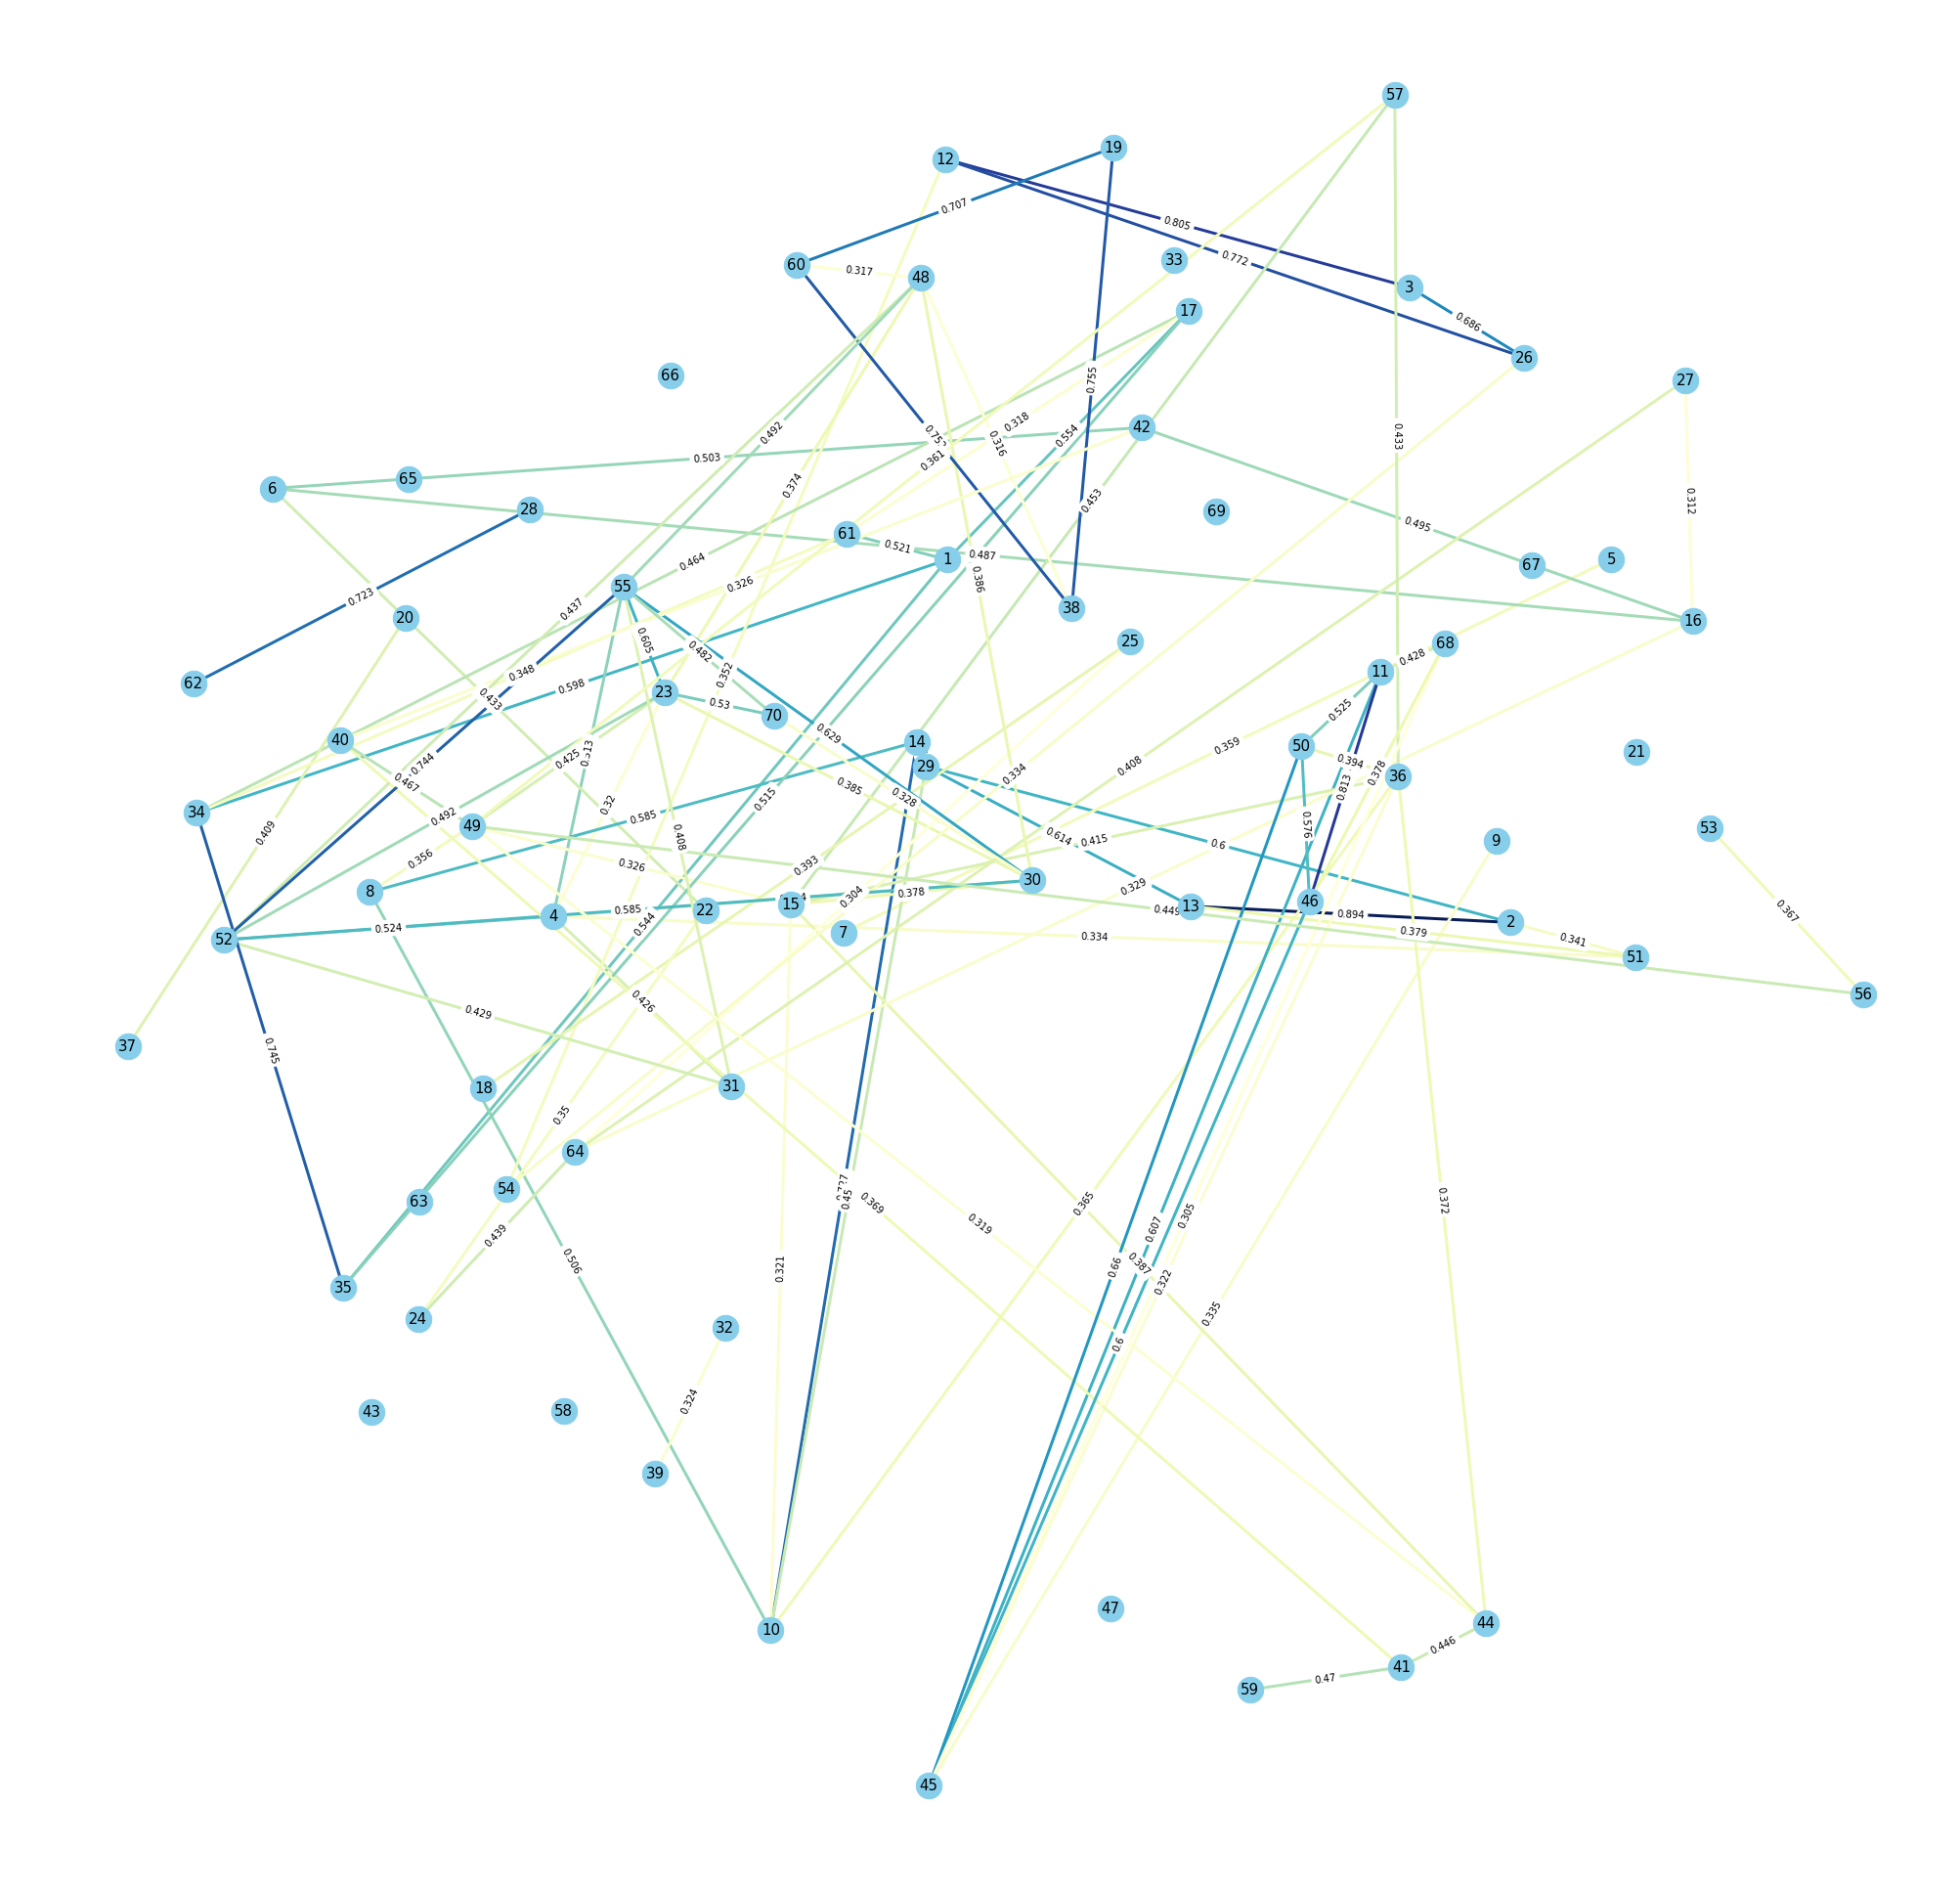

In [40]:
plot_by_true_pos(drd87_total_graph.network, pos, figsize=(35, 35), node_size=700, node_color="skyblue", save=True, file_name="DRD87_total_graph.png")

## DRD87's (spatial) network of neurons for the duration of `OpenArms_centerpoint`

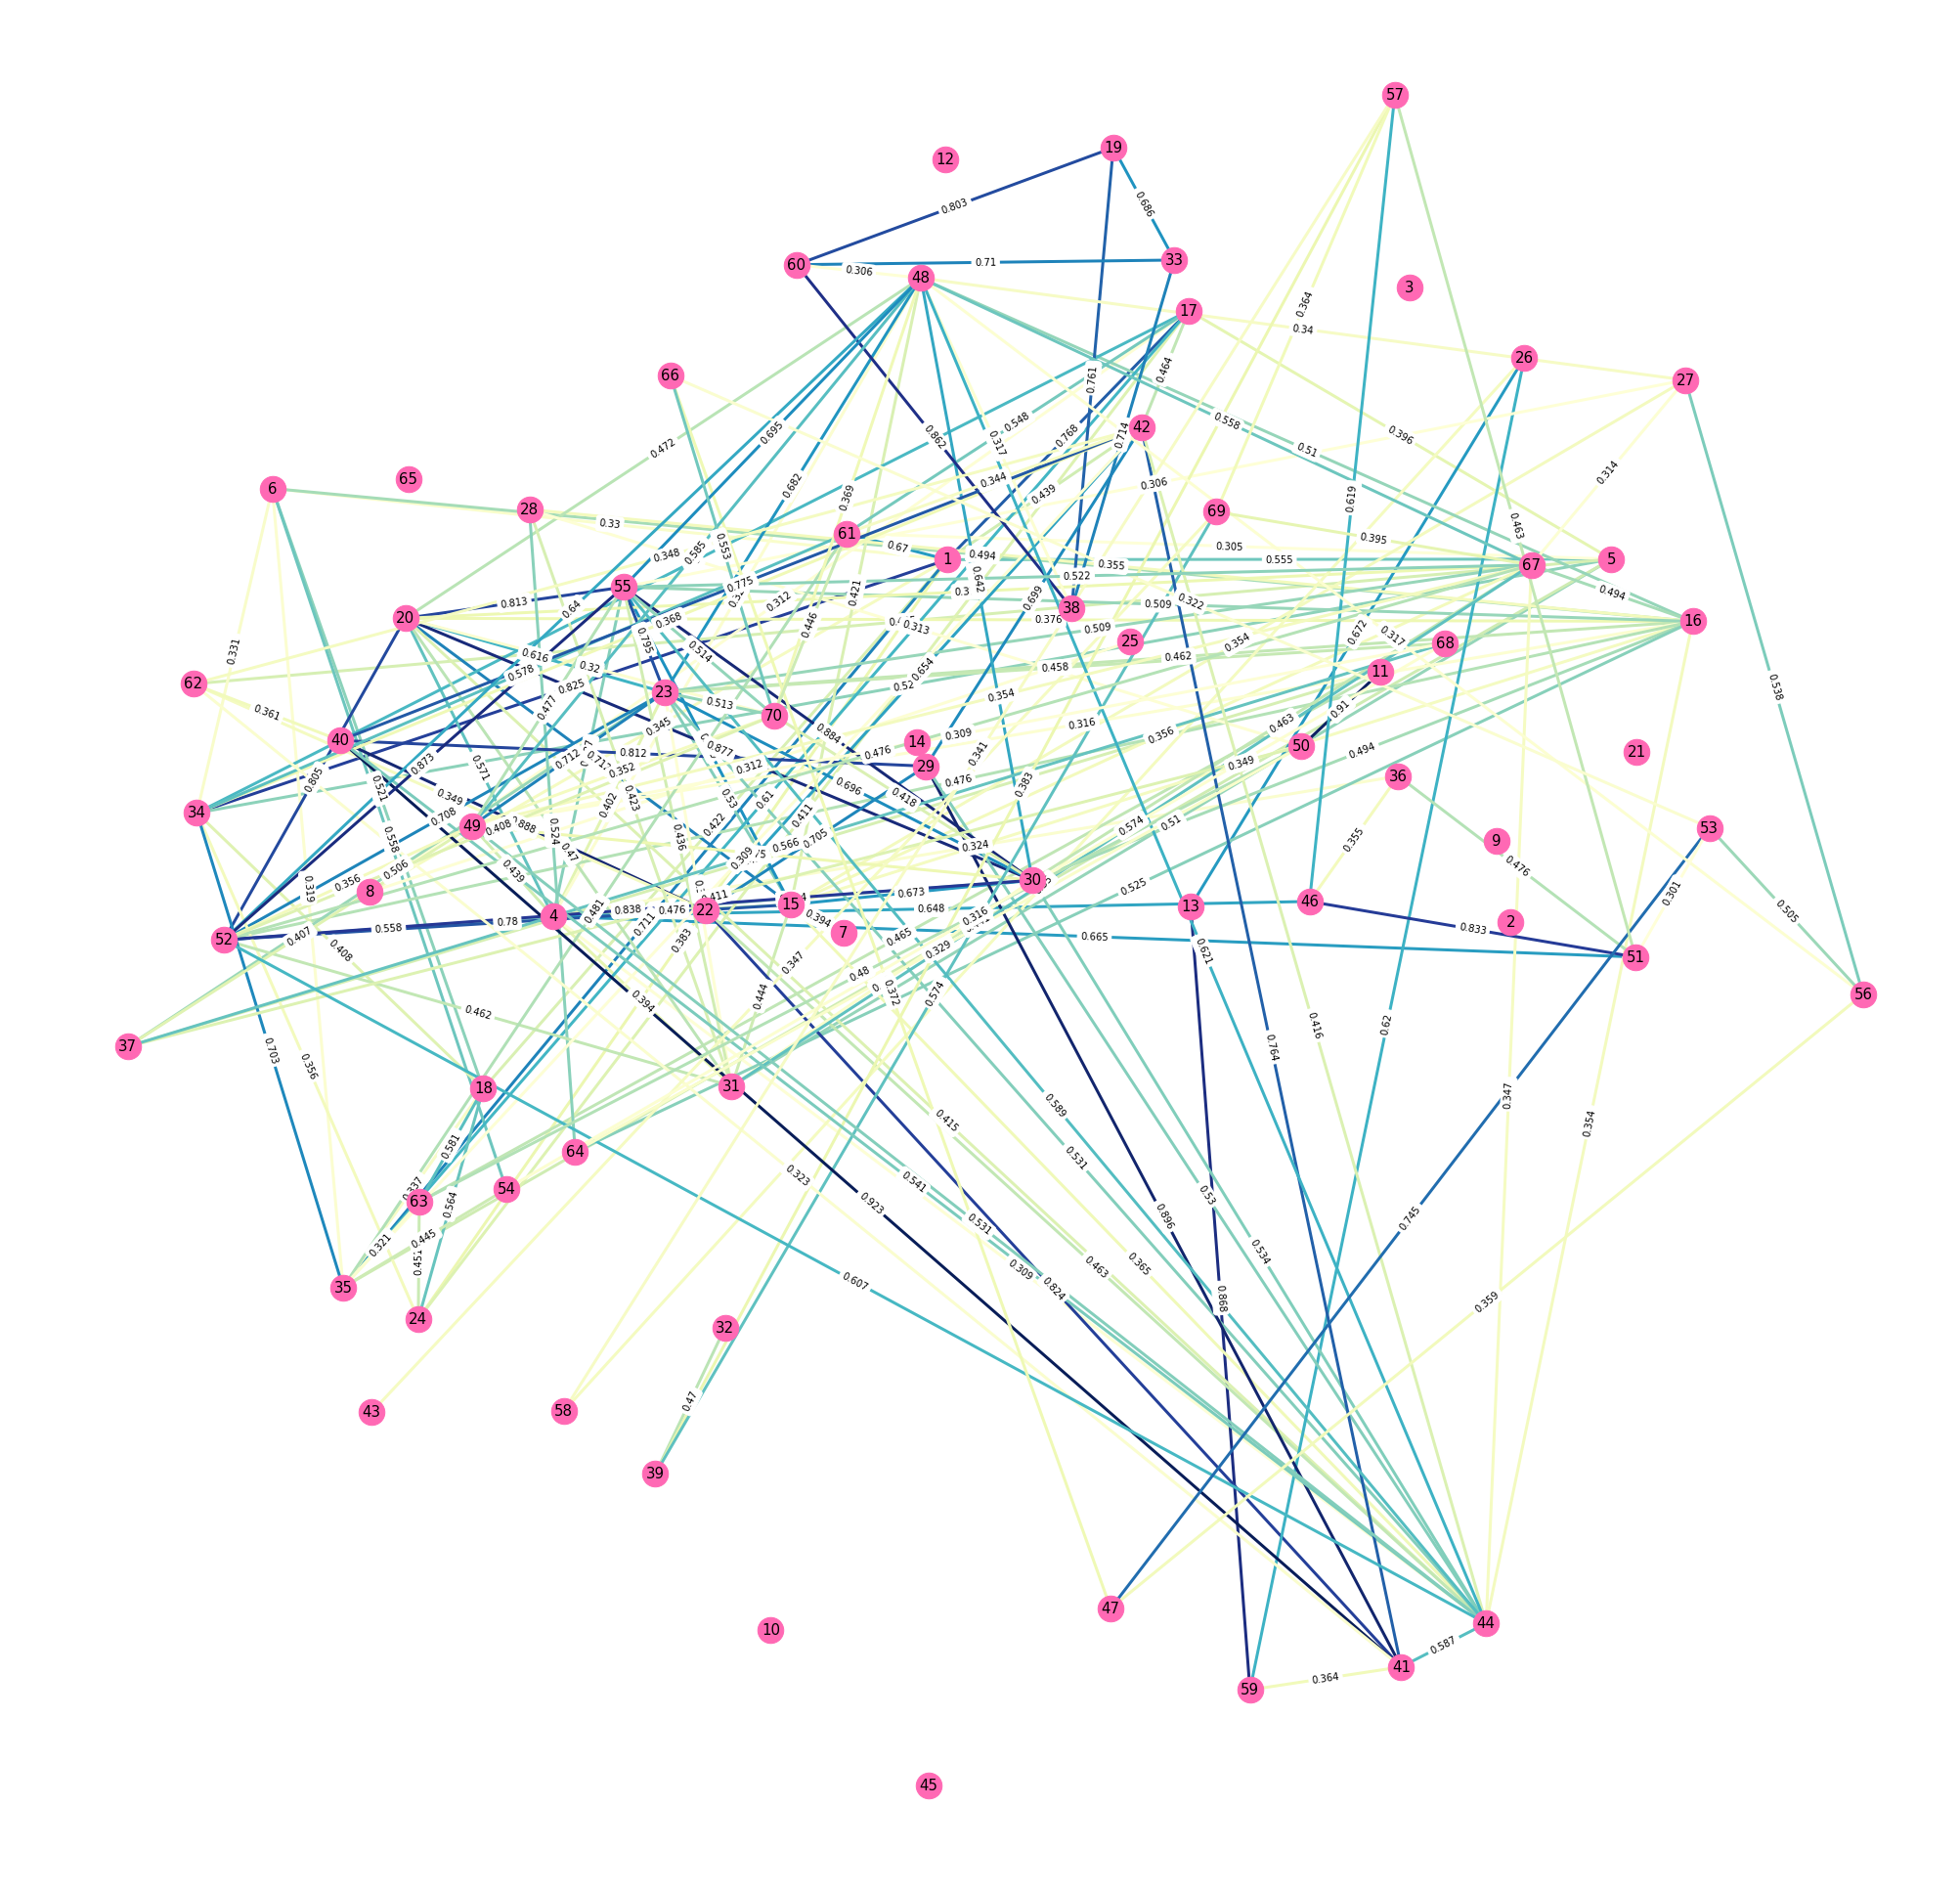

In [41]:
plot_by_true_pos(drd87_open_arms_graph.network, pos, figsize=(35, 35), node_size=700, node_color="hotpink", save=True, file_name="DRD87_open_arms_graph.png")

## DRD87's (spatial) network of neurons for the duration of `ClosedArms_centerpoint`

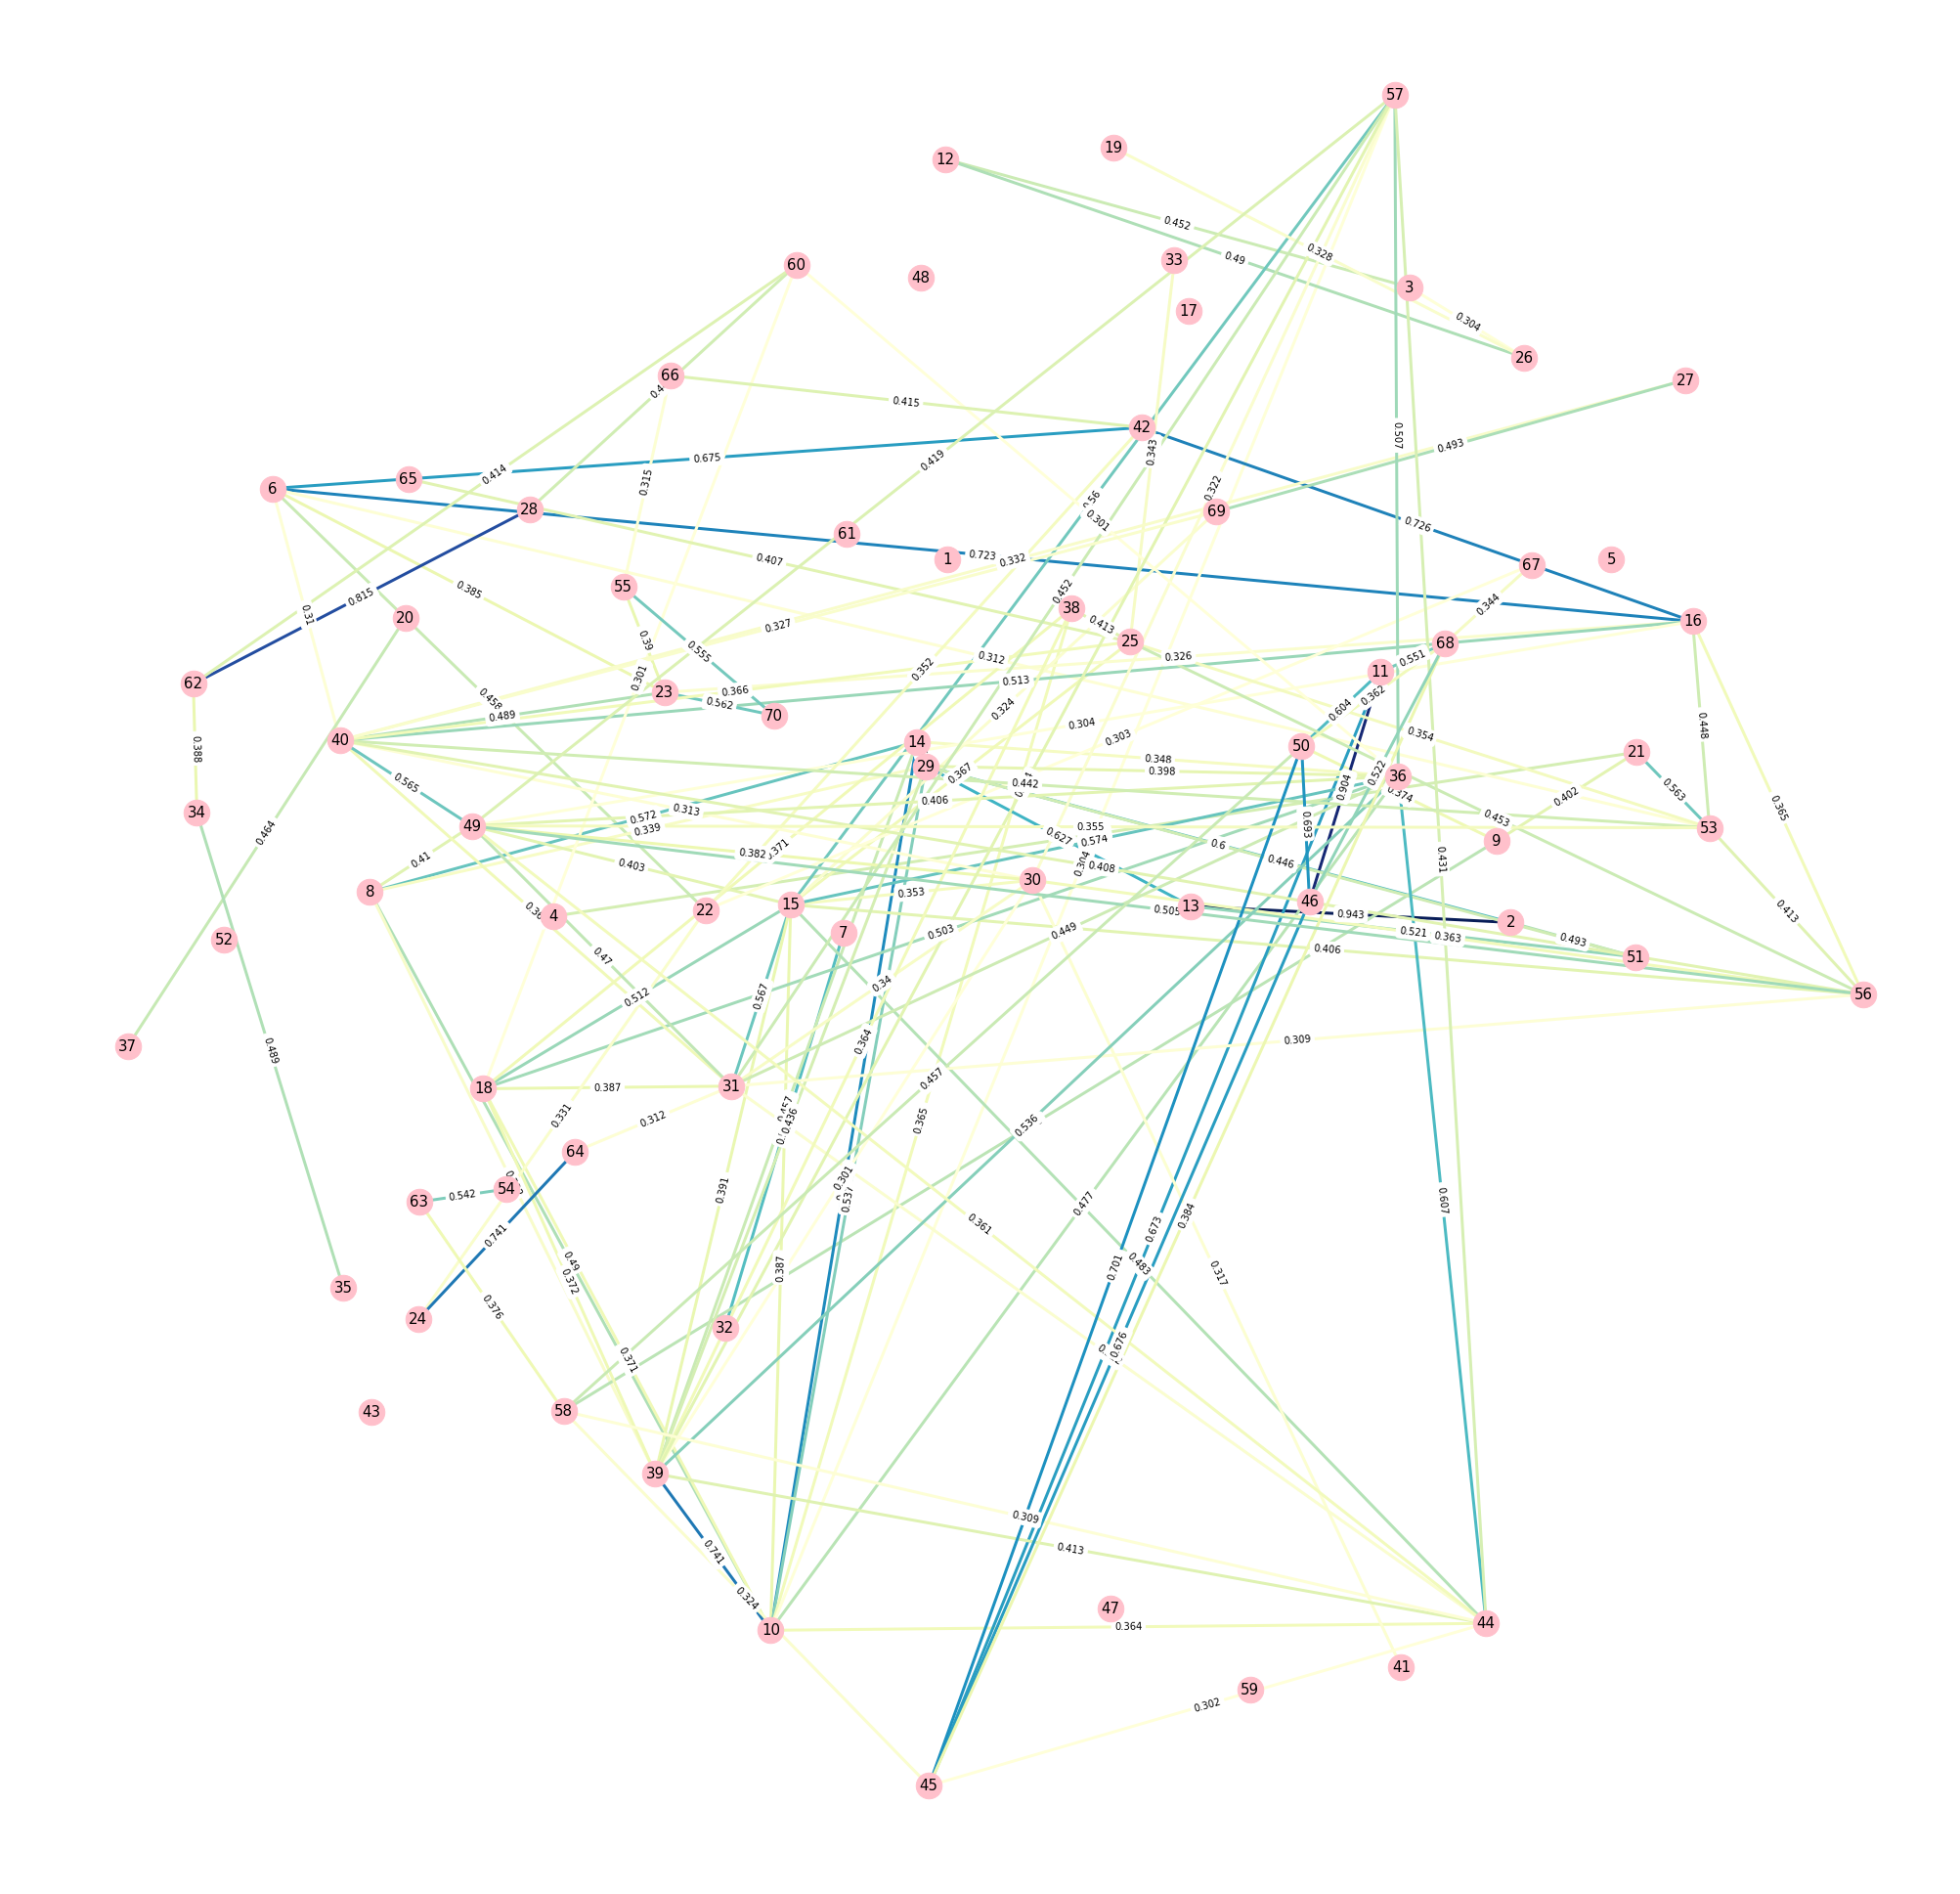

In [42]:
plot_by_true_pos(drd87_closed_arms_graph.network, pos, figsize=(35, 35), node_size=700, node_color="pink", save=True, file_name="DRD87_closed_arms_graph.png")

## DRD87's (spatial) network of neurons for the duration of when it was **not** in `OpenArms_centerpoint` *and* **not** in `ClosedArms_centerpoint`

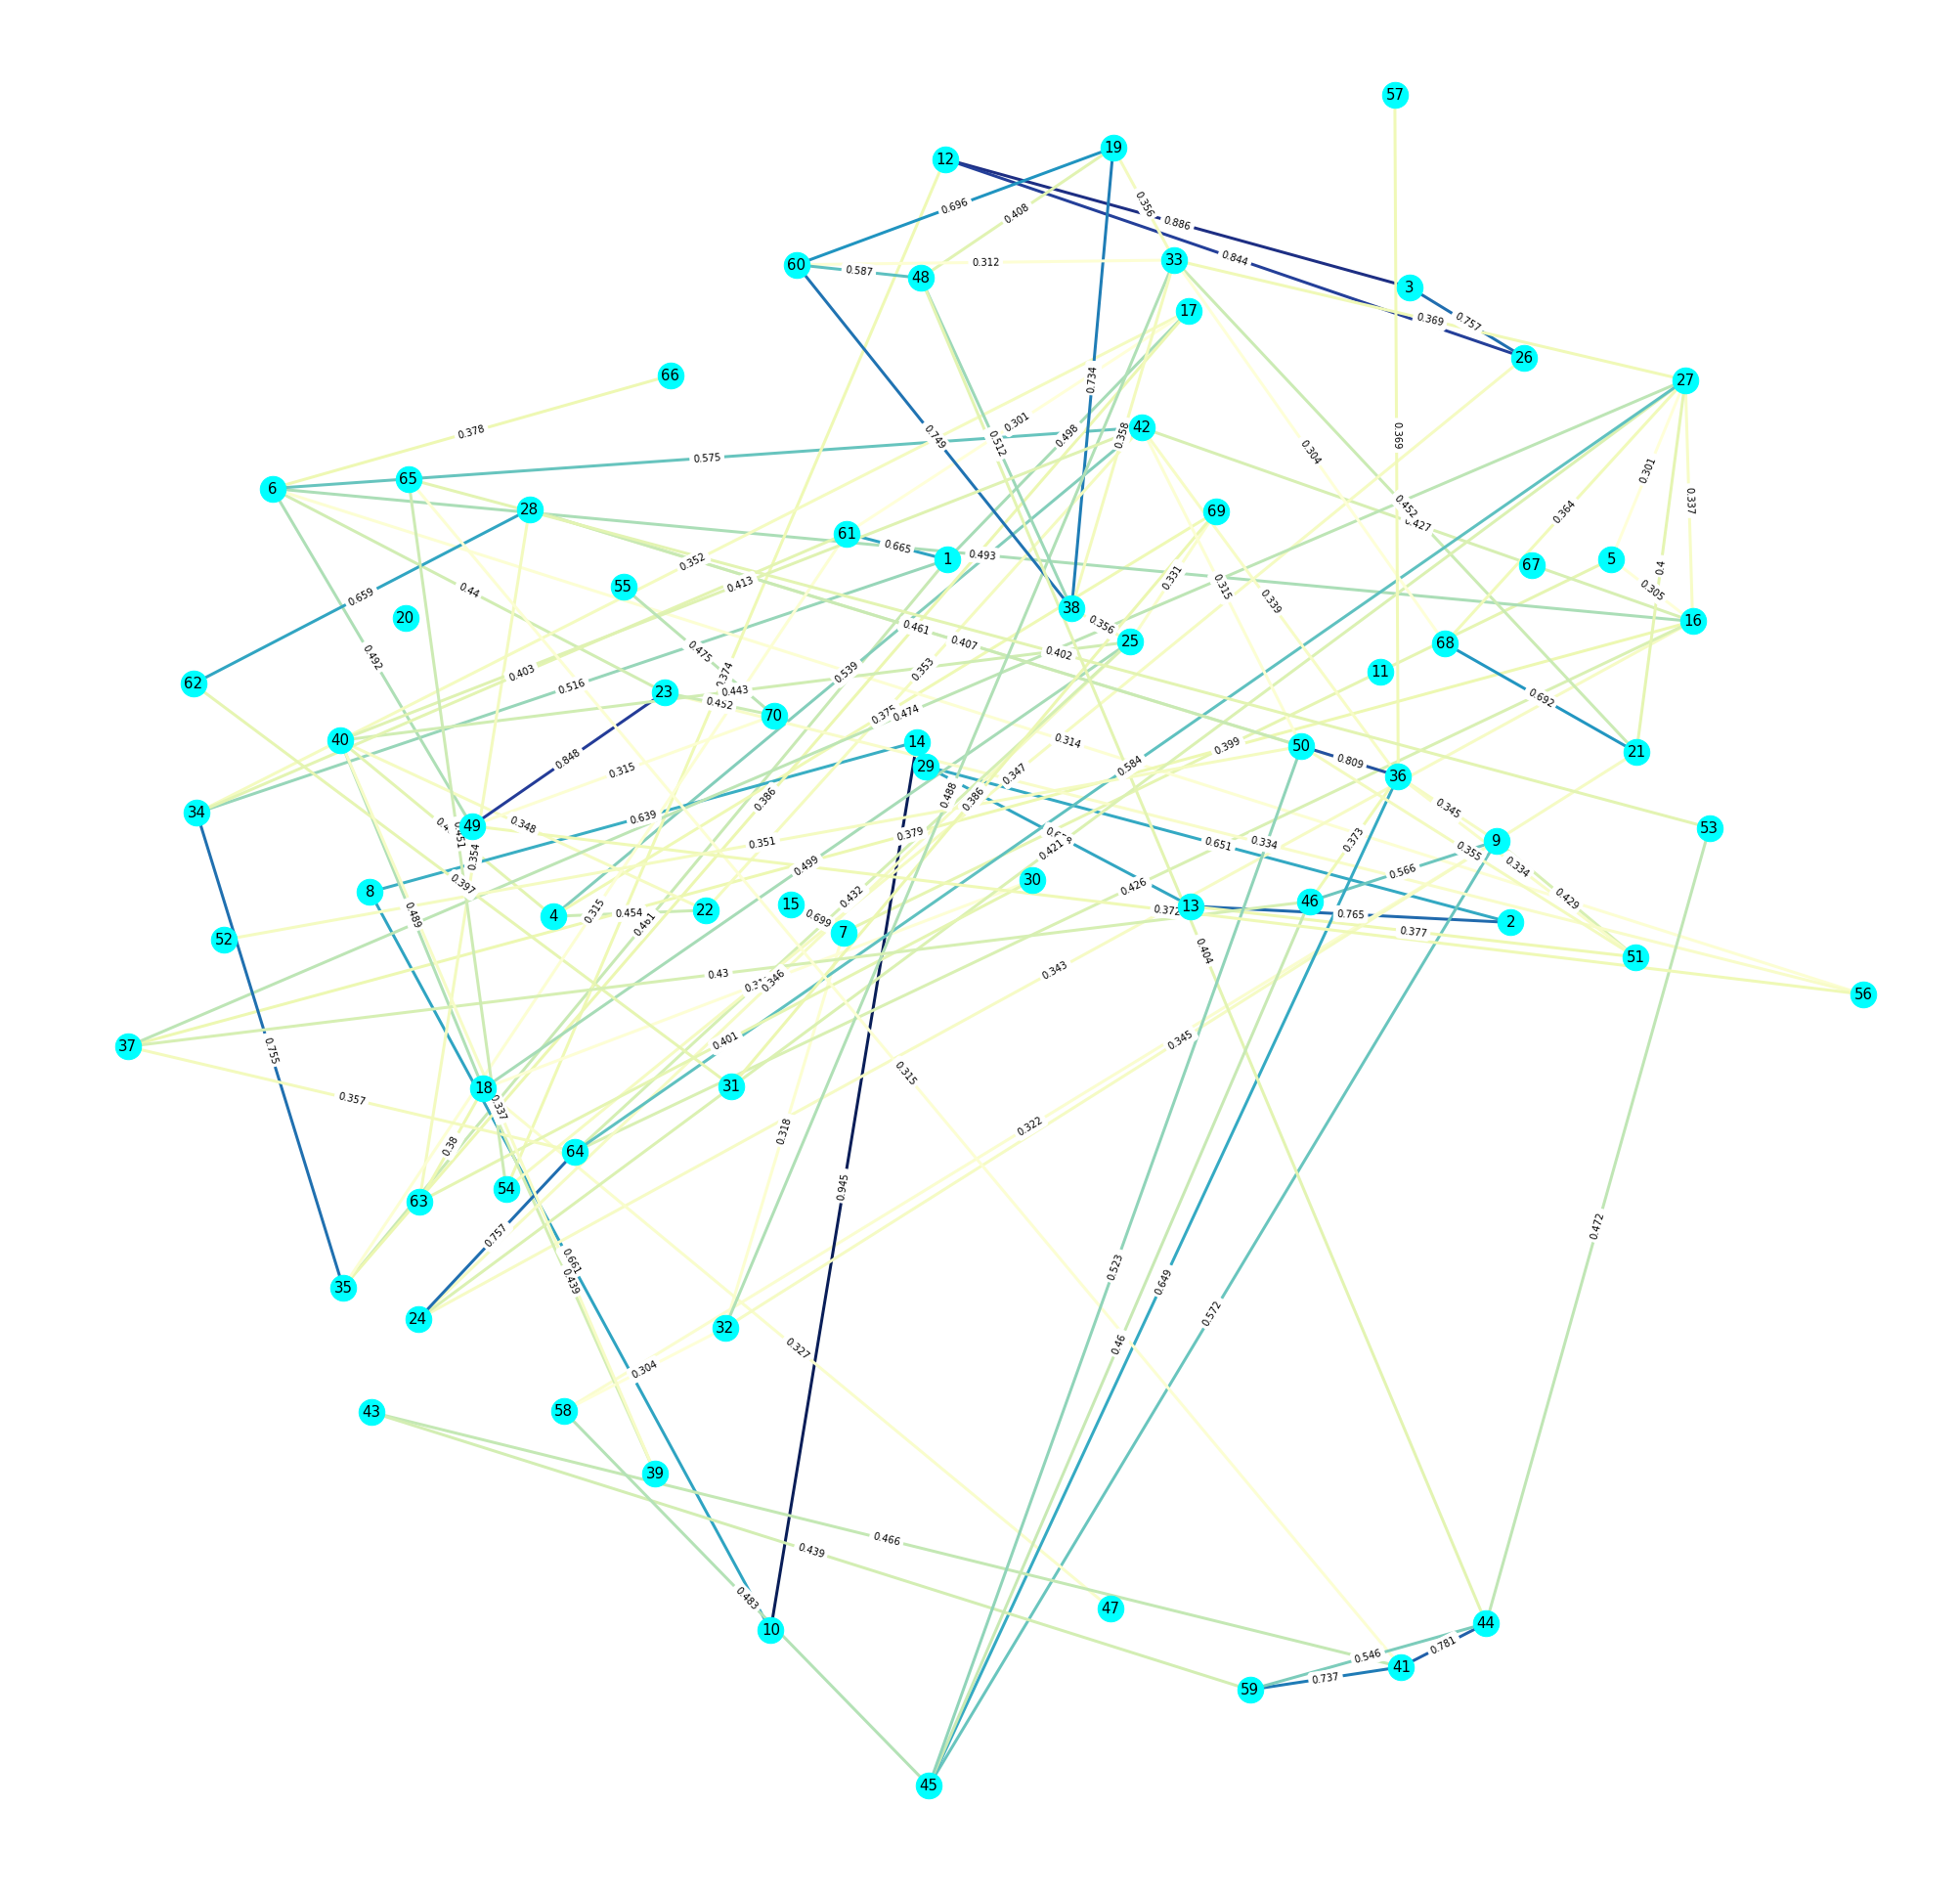

In [43]:
indices = drd87_fe.neuron_concated_behavior.loc[(drd87_fe.neuron_concated_behavior["OpenArms_centerpoint"] == 0) & (drd87_fe.neuron_concated_behavior["ClosedArms_centerpoint"] == 0)].index
drd87_center_graph = NeuronNetwork(drd87_fe.cell_transients_df.iloc[indices])
plot_by_true_pos(drd87_center_graph.network, pos, figsize=(35, 35), node_size=700, node_color="cyan", save=True, file_name="DRD87_center_graph.png")